In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Understanding the Dataset

### a. Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.


In [2]:
df = pd.read_csv(r"C:\Business Analyst Doc\Python\project\bank_marketing_updated_v1_1.csv")

In [3]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
df[["Job","Jobtype"]] = df["jobedu"].str.split(",",expand = True)

In [5]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Jobtype
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [6]:
df = df.drop('jobedu',axis=1)

In [7]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Jobtype
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [8]:
df[["month","year"]] = df["month"].str.split(",",expand = True)

In [9]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,response,Job,Jobtype,year
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,may,261 sec,1,-1,0,unknown,no,management,tertiary,2017
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,may,151 sec,1,-1,0,unknown,no,technician,secondary,2017
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,may,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,2017
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,may,92 sec,1,-1,0,unknown,no,blue-collar,unknown,2017
4,5,33.0,0,1,single,no,no,no,no,unknown,...,may,198 sec,1,-1,0,unknown,no,unknown,unknown,2017


In [10]:
df[['value', 'unit']] = df['duration'].str.split(expand=True)
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,response,Job,Jobtype,year,value,unit
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,1,-1,0,unknown,no,management,tertiary,2017,261,sec
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,1,-1,0,unknown,no,technician,secondary,2017,151,sec
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,1,-1,0,unknown,no,entrepreneur,secondary,2017,76,sec
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,1,-1,0,unknown,no,blue-collar,unknown,2017,92,sec
4,5,33.0,0,1,single,no,no,no,no,unknown,...,1,-1,0,unknown,no,unknown,unknown,2017,198,sec


In [11]:
# Split 'duration' column into numerical value and unit
df[['value', 'unit']] = df['duration'].str.split(expand=True)

# Convert 'value' column to numeric
df['value'] = pd.to_numeric(df['value'])

# Convert values in 'value' column to minutes if the 'unit' is 'sec'
df.loc[df['unit'] == 'sec', 'value'] /= 60
df.loc[df['unit'] == 'sec', 'unit'] = 'min'

print(df['value'])

0         4.350000
1         2.516667
2         1.266667
3         1.533333
4         3.300000
           ...    
45206    16.283333
45207     7.600000
45208    18.783333
45209     8.466667
45210     6.016667
Name: value, Length: 45211, dtype: float64


In [12]:
df.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'targeted',
       'default', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response', 'Job',
       'Jobtype', 'year', 'value', 'unit'],
      dtype='object')

In [13]:
df.drop("duration",axis=1,inplace=True)

In [14]:
df.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'targeted',
       'default', 'housing', 'loan', 'contact', 'day', 'month', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'Job', 'Jobtype', 'year',
       'value', 'unit'],
      dtype='object')

In [15]:
df.rename(columns = {"value":"duration_min"}, inplace=True) 
df.drop("unit",axis=1,inplace=True)
df.shape

(45211, 21)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerid    45211 non-null  int64  
 1   age           45191 non-null  float64
 2   salary        45211 non-null  int64  
 3   balance       45211 non-null  int64  
 4   marital       45211 non-null  object 
 5   targeted      45211 non-null  object 
 6   default       45211 non-null  object 
 7   housing       45211 non-null  object 
 8   loan          45211 non-null  object 
 9   contact       45211 non-null  object 
 10  day           45211 non-null  int64  
 11  month         45161 non-null  object 
 12  campaign      45211 non-null  int64  
 13  pdays         45211 non-null  int64  
 14  previous      45211 non-null  int64  
 15  poutcome      45211 non-null  object 
 16  response      45181 non-null  object 
 17  Job           45211 non-null  object 
 18  Jobtype       45211 non-nu

In [17]:
df

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,month,campaign,pdays,previous,poutcome,response,Job,Jobtype,year,duration_min
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,may,1,-1,0,unknown,no,management,tertiary,2017,4.350000
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,may,1,-1,0,unknown,no,technician,secondary,2017,2.516667
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,may,1,-1,0,unknown,no,entrepreneur,secondary,2017,1.266667
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,may,1,-1,0,unknown,no,blue-collar,unknown,2017,1.533333
4,5,33.0,0,1,single,no,no,no,no,unknown,...,may,1,-1,0,unknown,no,unknown,unknown,2017,3.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,...,nov,3,-1,0,unknown,yes,technician,tertiary,2017,16.283333
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,...,nov,2,-1,0,unknown,yes,retired,primary,2017,7.600000
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,...,nov,5,184,3,success,yes,retired,secondary,2017,18.783333
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,...,nov,4,-1,0,unknown,no,blue-collar,secondary,2017,8.466667


In [18]:
df.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'targeted',
       'default', 'housing', 'loan', 'contact', 'day', 'month', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'Job', 'Jobtype', 'year',
       'duration_min'],
      dtype='object')

### b.Inspect for any instances of missing values, outliers, or data inconsistencies.

In [19]:
# Method 1 to find continues data
cont = df.select_dtypes(include=np.number)

In [20]:
cont.columns

Index(['customerid', 'age', 'salary', 'balance', 'day', 'campaign', 'pdays',
       'previous', 'duration_min'],
      dtype='object')

In [21]:
# finding missing value
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 customerid       0
age             20
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month           50
campaign         0
pdays            0
previous         0
poutcome         0
response        30
Job              0
Jobtype          0
year            50
duration_min     0
dtype: int64


In [22]:
# Imputation of missing values for numerical columns with median imputation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    if df[column].isnull().any():
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

In [23]:
# Imputation of missing values for categorical columns with mode imputation (as before)
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if df[column].isnull().any():
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

In [24]:
# Confirming if there are no missing values after imputation
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

Missing values after imputation:
 customerid      0
age             0
salary          0
balance         0
marital         0
targeted        0
default         0
housing         0
loan            0
contact         0
day             0
month           0
campaign        0
pdays           0
previous        0
poutcome        0
response        0
Job             0
Jobtype         0
year            0
duration_min    0
dtype: int64


In [25]:
from scipy.stats.mstats import winsorize

In [26]:
for column in cont:
    df[column] = winsorize(df[column], limits=[0.05, 0.05])

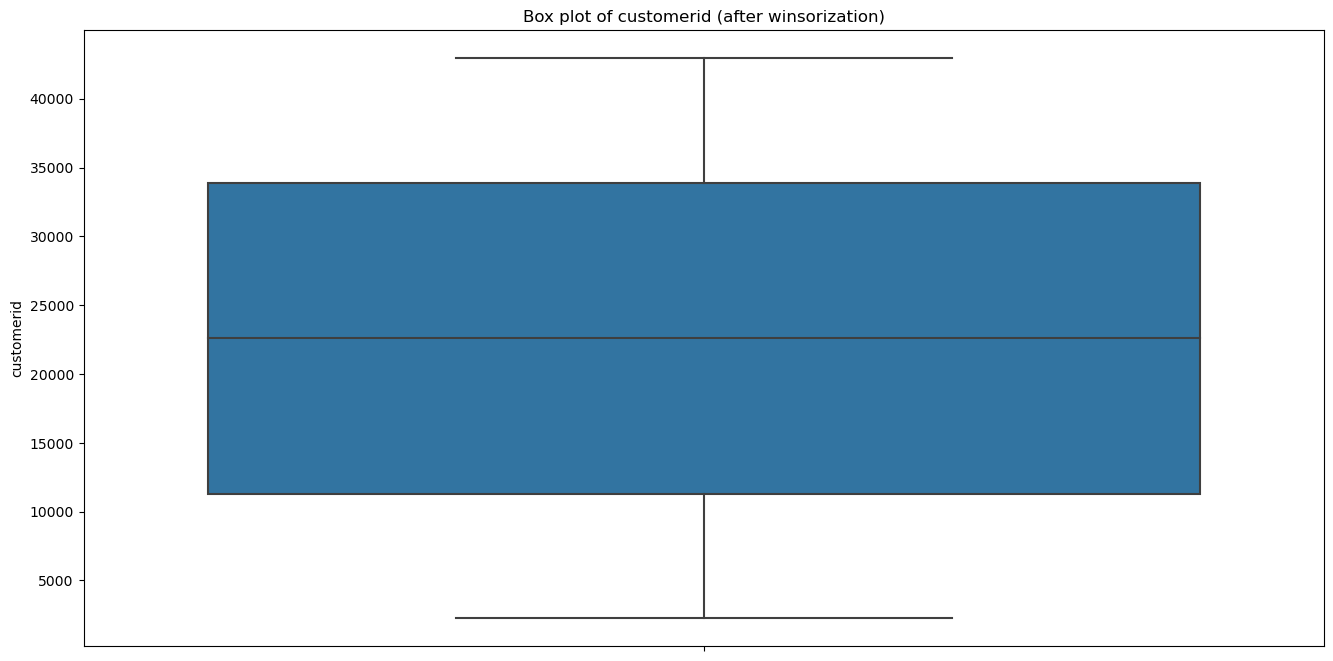

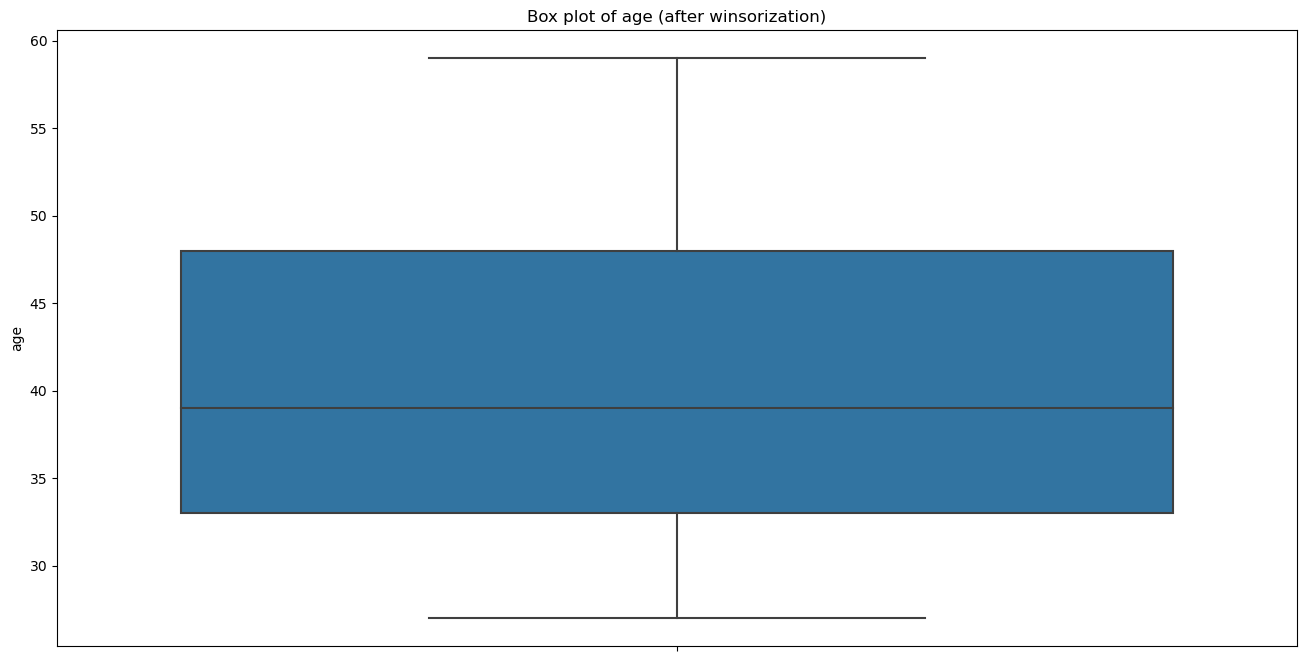

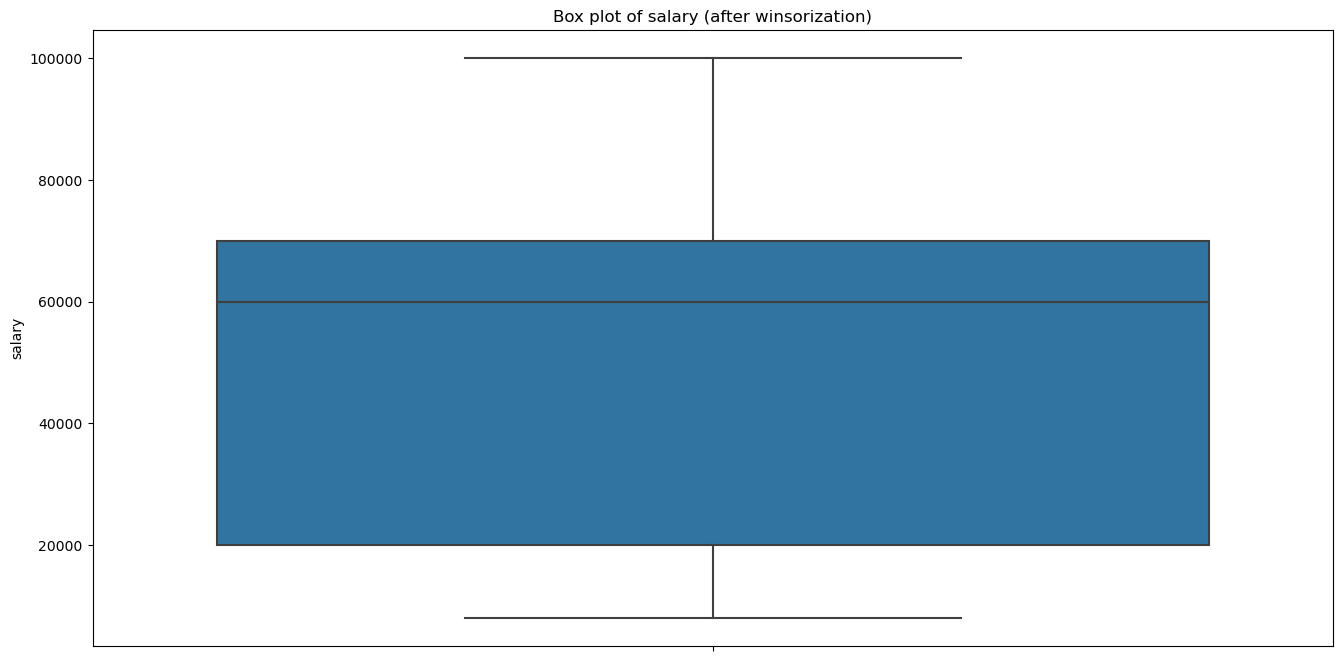

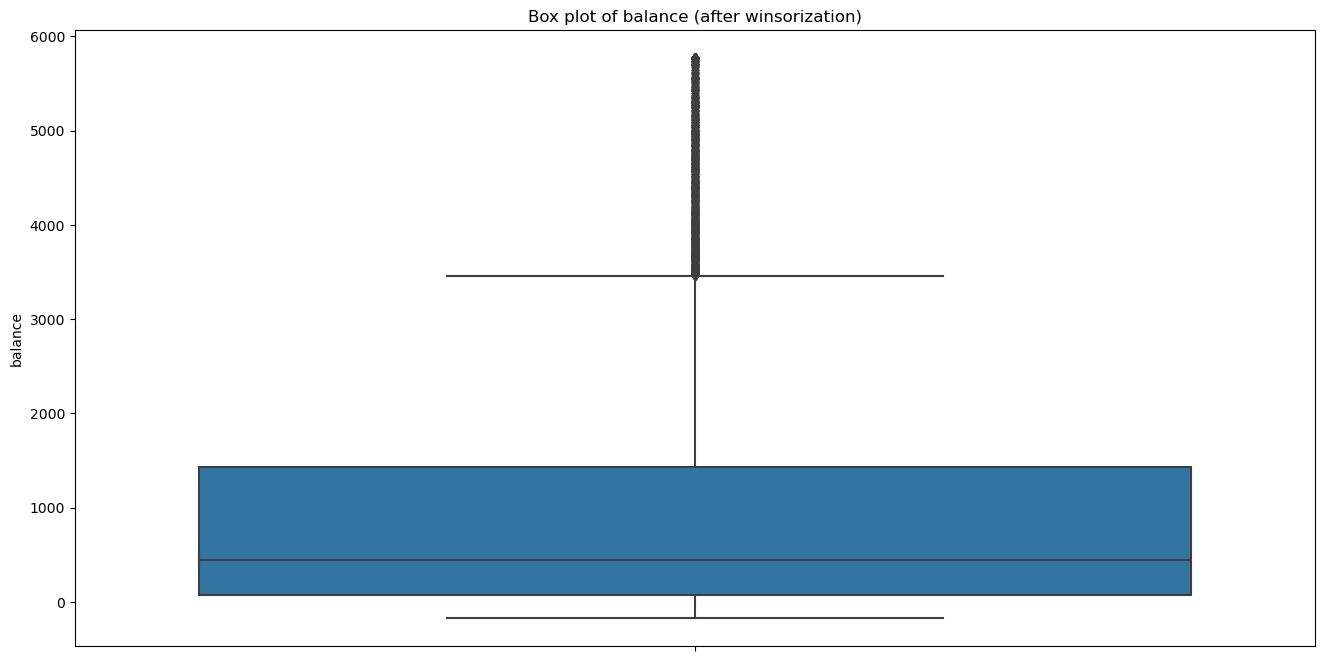

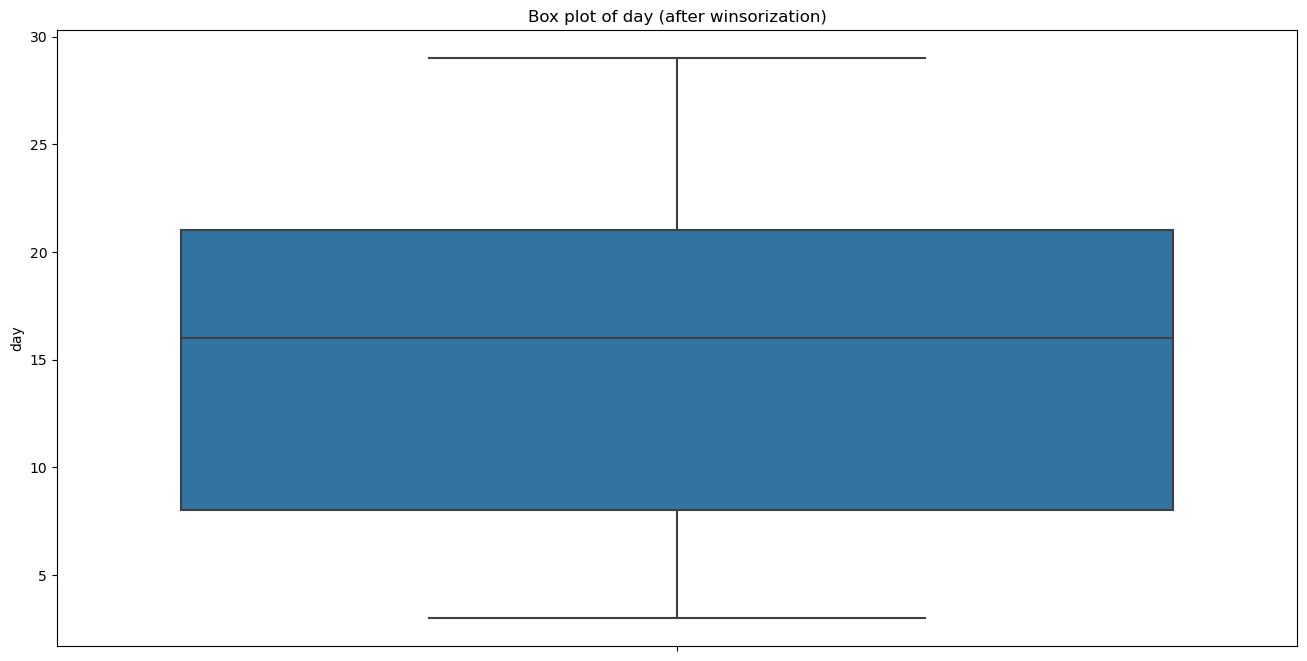

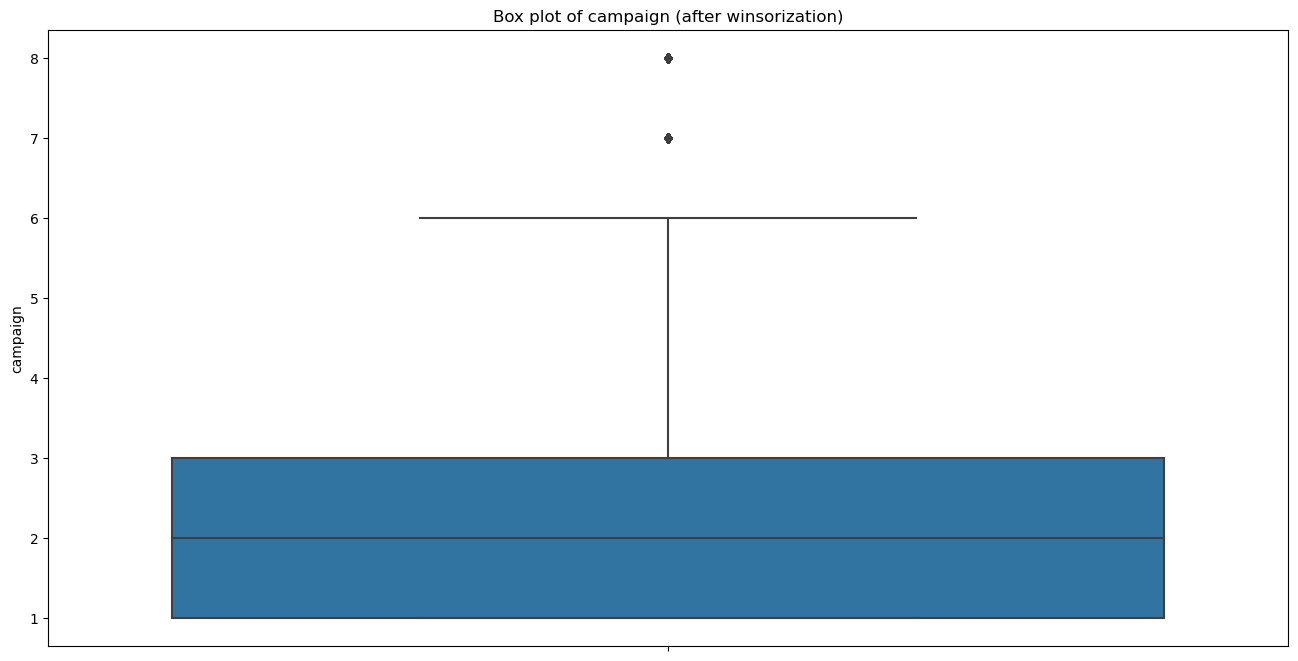

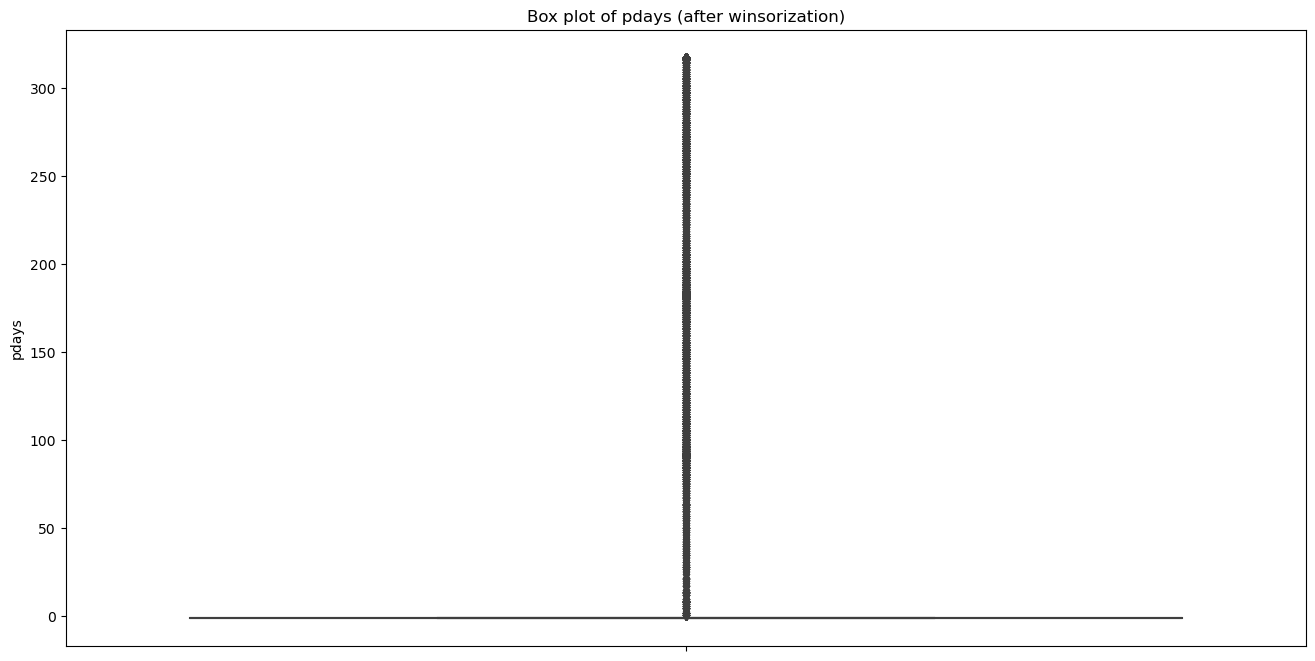

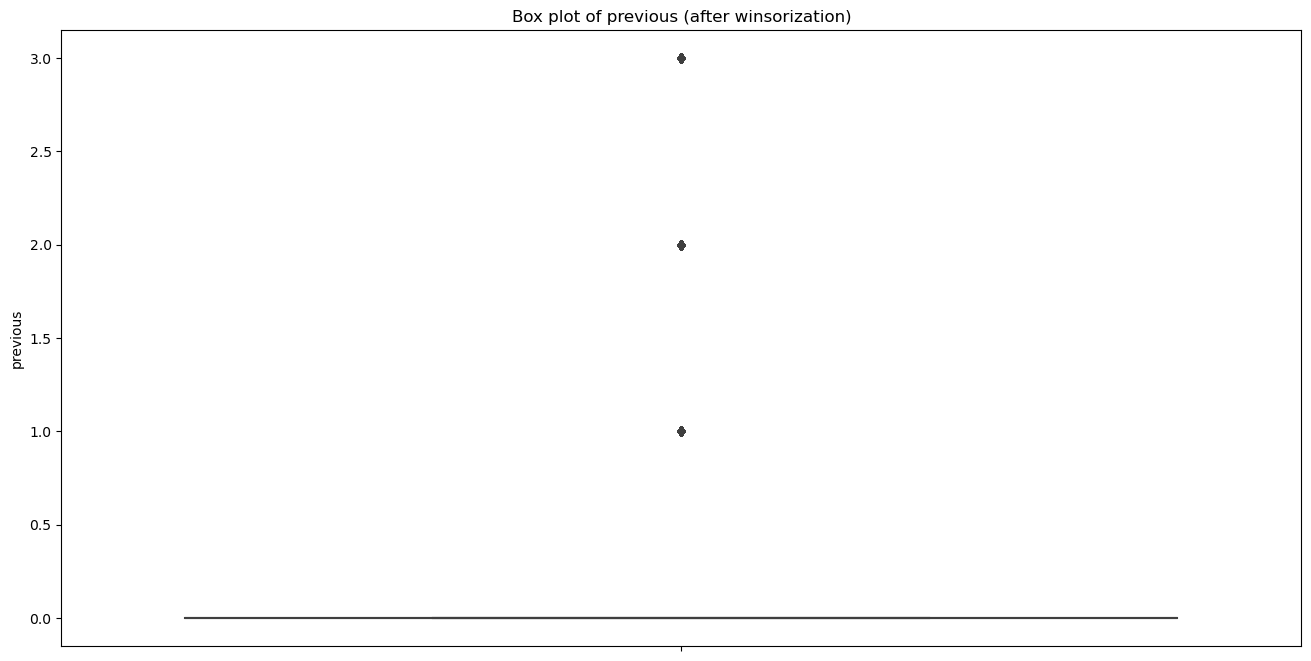

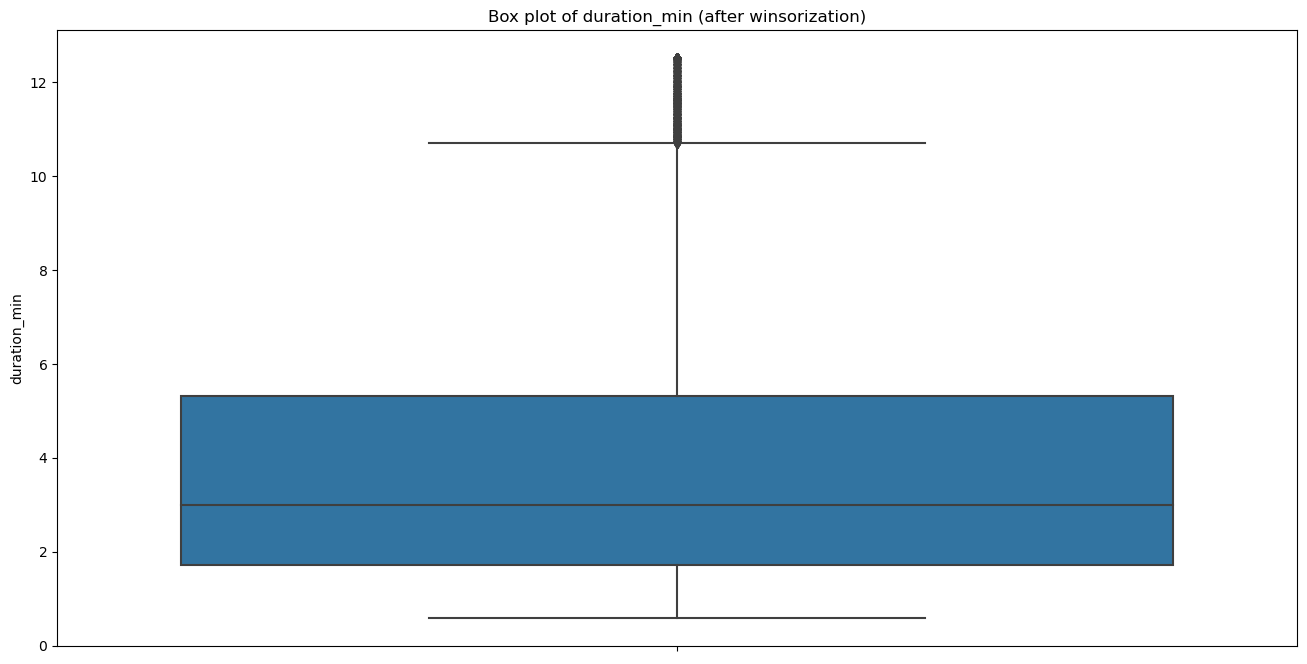

In [27]:
# Plot box plots again after winsorization
for column in cont:
    plt.figure(figsize=(16, 8))
    sns.boxplot(y=column, data=df)
    plt.title(f'Box plot of {column} (after winsorization)')
    plt.show()

### Normalization and Categorical Encoding

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [29]:
# Defining numerical and categorical columns
numerical_columns = ['age', 'salary', 'balance', 'campaign', 'day', 'pdays', 'previous', 'duration_min']
scaler = StandardScaler()

In [30]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [31]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,-8.046667e-17,1.000011,-1.419388,-0.800589,-0.181790,0.746409,1.880874
salary,45211.0,2.388854e-17,1.000011,-1.576622,-1.186388,0.114393,0.439589,1.415175
balance,45211.0,6.537917e-17,1.000011,-0.815153,-0.660849,-0.423068,0.196681,2.941282
campaign,45211.0,-5.029167e-18,1.000011,-0.793438,-0.793438,-0.268508,0.256422,2.881070
day,45211.0,1.445886e-17,1.000011,-1.569700,-0.955873,0.026250,0.640076,1.622199
pdays,45211.0,6.035001e-17,1.000011,-0.426599,-0.426599,-0.426599,-0.426599,3.092238
previous,45211.0,-4.023334e-17,1.000011,-0.429644,-0.429644,-0.429644,-0.429644,2.974006
duration_min,45211.0,-1.936229e-16,1.000011,-1.080133,-0.725685,-0.324324,0.400210,2.651999


In [32]:
# Defining categorical columns
categorical_columns = ['marital', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Job', 'Jobtype', 'year']

In [33]:
# Check unique values for each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f'Unique values for column "{column}": {unique_values}')

Unique values for column "marital": ['married' 'single' 'divorced']
Unique values for column "targeted": ['yes' 'no']
Unique values for column "default": ['no' 'yes']
Unique values for column "housing": ['yes' 'no']
Unique values for column "loan": ['no' 'yes']
Unique values for column "contact": ['unknown' 'cellular' 'telephone']
Unique values for column "month": ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values for column "poutcome": ['unknown' 'failure' 'other' 'success']
Unique values for column "Job": ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values for column "Jobtype": ['tertiary' 'secondary' 'unknown' 'primary']
Unique values for column "year": [' 2017']


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerid    45211 non-null  int64  
 1   age           45211 non-null  float64
 2   salary        45211 non-null  float64
 3   balance       45211 non-null  float64
 4   marital       45211 non-null  object 
 5   targeted      45211 non-null  object 
 6   default       45211 non-null  object 
 7   housing       45211 non-null  object 
 8   loan          45211 non-null  object 
 9   contact       45211 non-null  object 
 10  day           45211 non-null  float64
 11  month         45211 non-null  object 
 12  campaign      45211 non-null  float64
 13  pdays         45211 non-null  float64
 14  previous      45211 non-null  float64
 15  poutcome      45211 non-null  object 
 16  response      45211 non-null  object 
 17  Job           45211 non-null  object 
 18  Jobtype       45211 non-nu

# 2.Descriptive Statistics

### a. Derive summary statistics (mean, median, standard deviation) for relevant columns.

In [35]:
df.describe().T

C:\Users\Avinash\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,count,mean,std,min,25%,50%,75%,max
customerid,45211.0,2.260600e+04,12867.426393,2261.000000,11303.500000,22606.000000,33908.500000,42951.000000
age,45211.0,-8.046667e-17,1.000011,-1.419388,-0.800589,-0.181790,0.746409,1.880874
salary,45211.0,2.388854e-17,1.000011,-1.576622,-1.186388,0.114393,0.439589,1.415175
balance,45211.0,6.537917e-17,1.000011,-0.815153,-0.660849,-0.423068,0.196681,2.941282
day,45211.0,1.445886e-17,1.000011,-1.569700,-0.955873,0.026250,0.640076,1.622199
campaign,45211.0,-5.029167e-18,1.000011,-0.793438,-0.793438,-0.268508,0.256422,2.881070
pdays,45211.0,6.035001e-17,1.000011,-0.426599,-0.426599,-0.426599,-0.426599,3.092238
previous,45211.0,-4.023334e-17,1.000011,-0.429644,-0.429644,-0.429644,-0.429644,2.974006
duration_min,45211.0,-1.936229e-16,1.000011,-1.080133,-0.725685,-0.324324,0.400210,2.651999


### b.  Examine the distribution of the target variable, indicating responses to the term deposit campaign

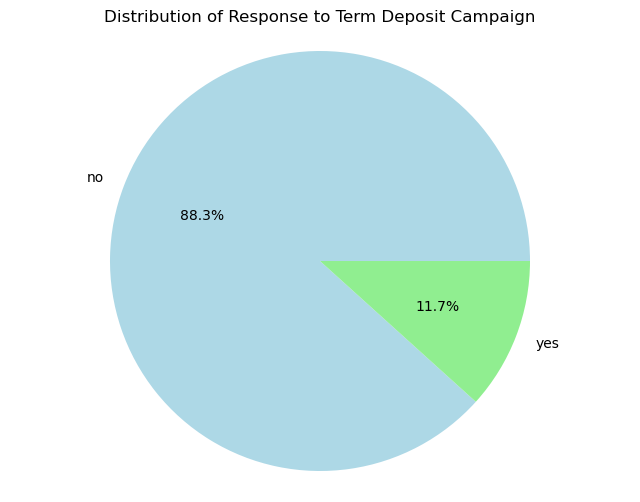

In [36]:
# Calculate response counts
response_counts = df['response'].value_counts()

# Plot the distribution of the target variable (response) as a pie chart with percentage labels
plt.figure(figsize=(8, 6))
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Response to Term Deposit Campaign')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

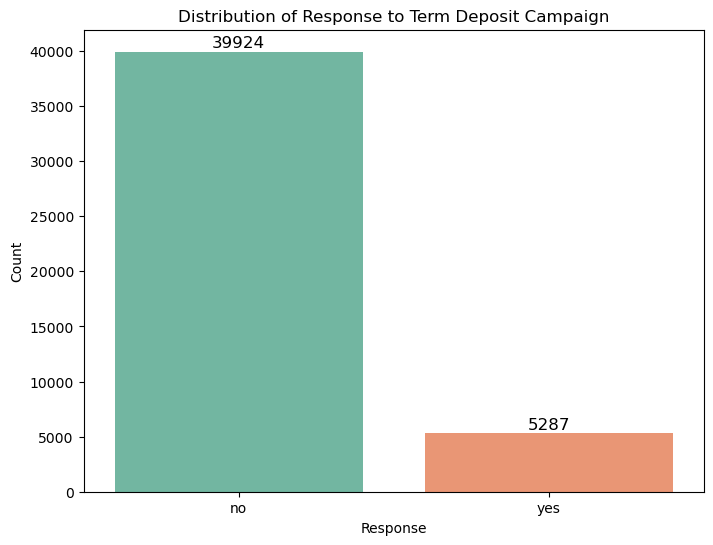

In [37]:
# Plot the distribution of the target variable (response)
plt.figure(figsize=(8, 6))
sns.countplot(x='response', data=df, palette='Set2')
plt.title('Distribution of Response to Term Deposit Campaign')
plt.xlabel('Response')
plt.ylabel('Count')

# Add count labels on top of each bar
total_counts = df['response'].value_counts()
for i, count in enumerate(total_counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

# 3.Univariate Analysis

### a.Examine the distribution of individual key features, such as age, balance, and call duration.

In [38]:
# Define key features for examination
key_features = ['age', 'balance', 'duration_min']

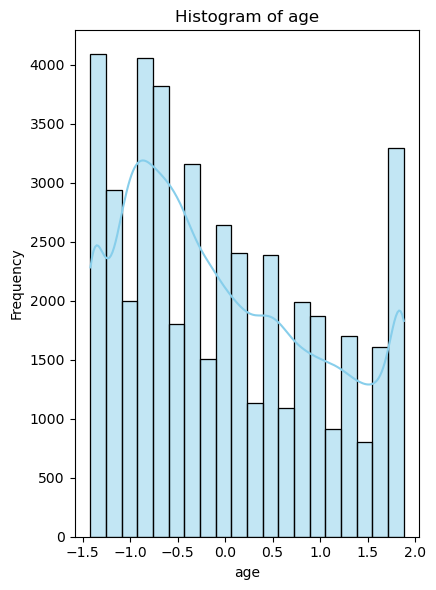

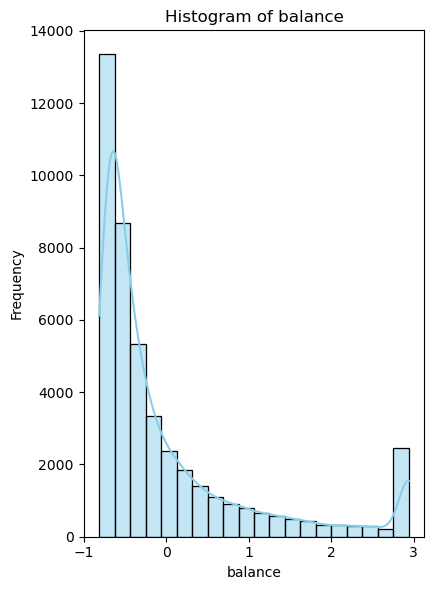

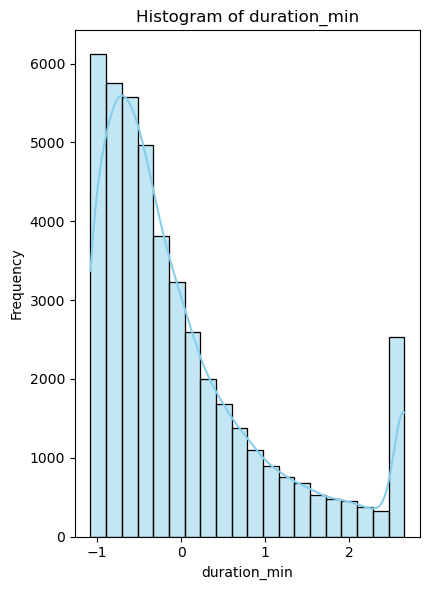

In [39]:
# histogram
for feature in key_features:
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### b. Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.


In [40]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

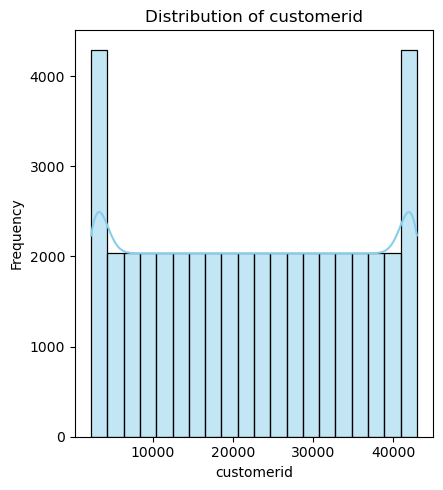

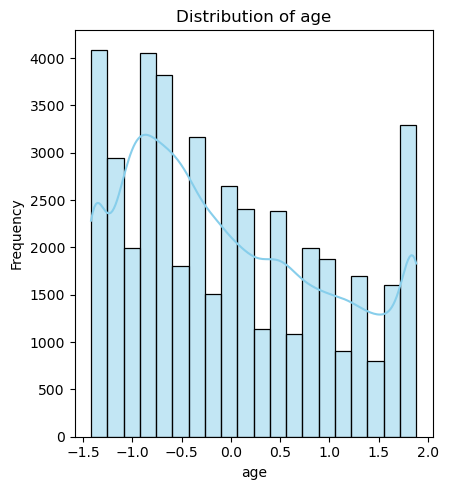

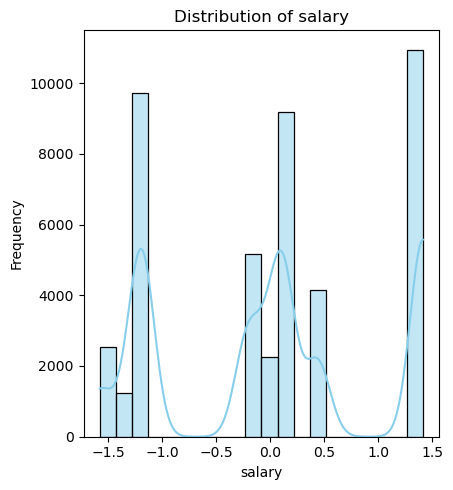

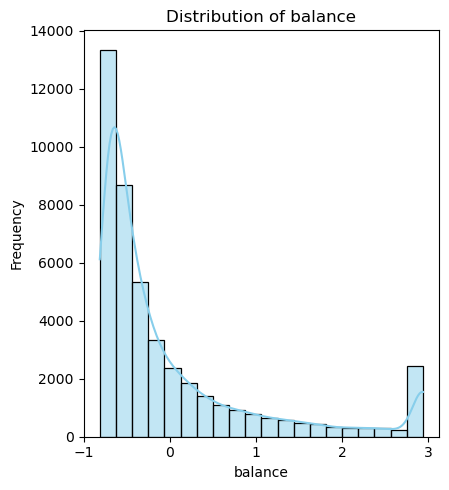

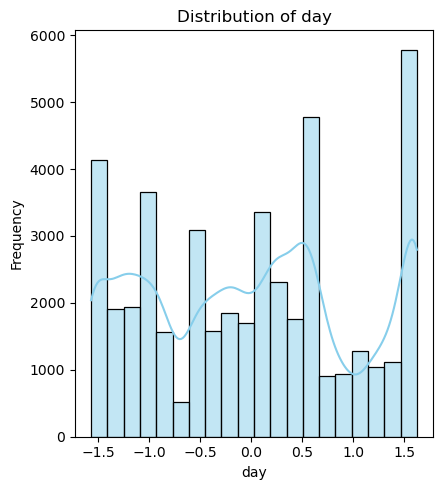

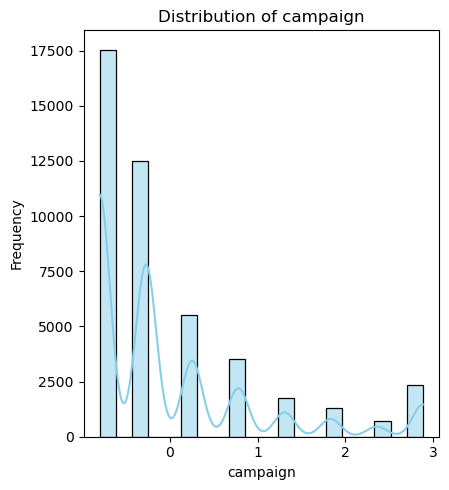

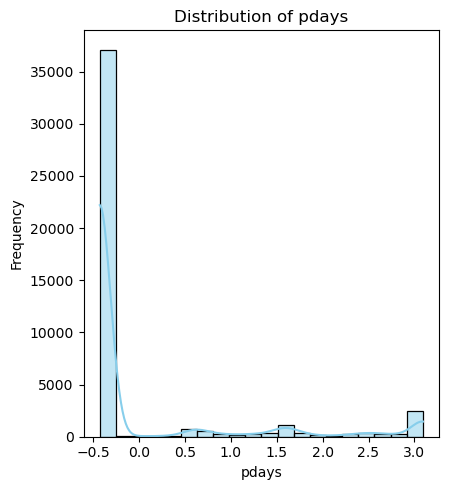

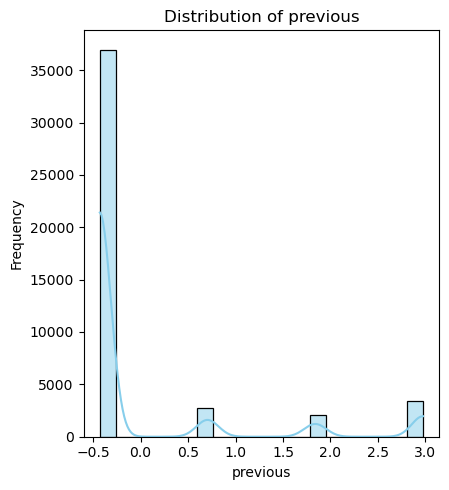

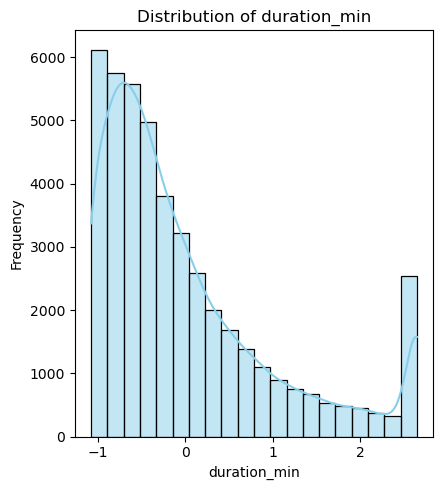

In [41]:
# Histograms
for feature in numerical_columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

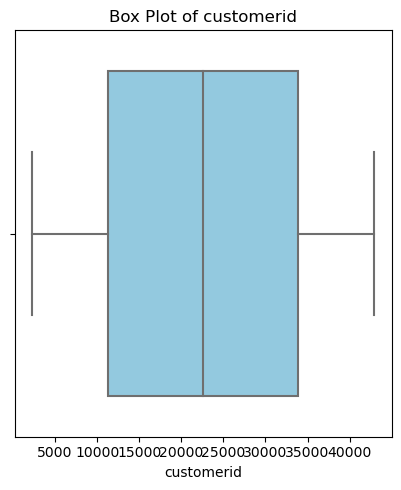

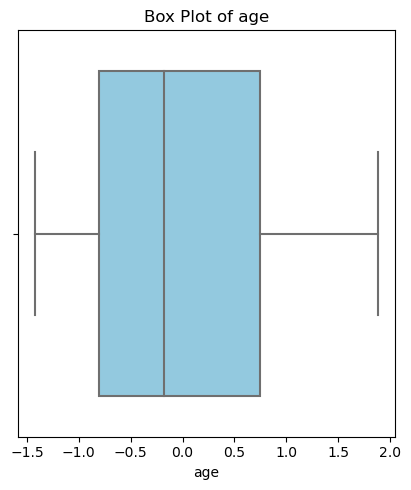

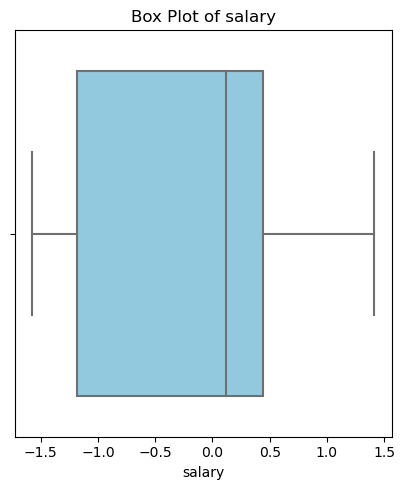

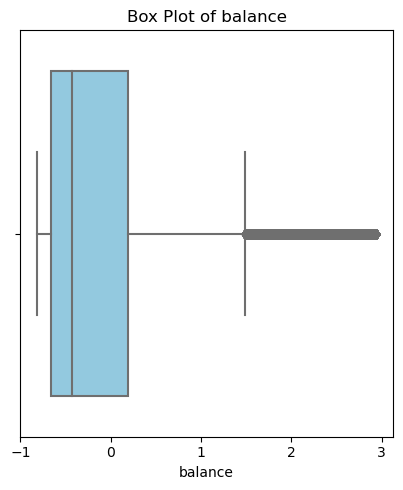

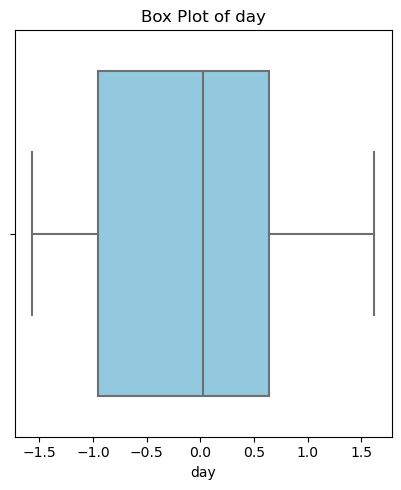

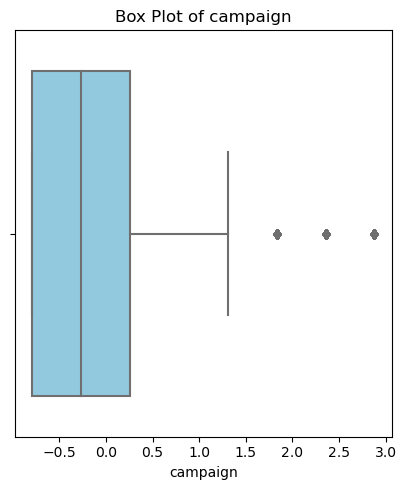

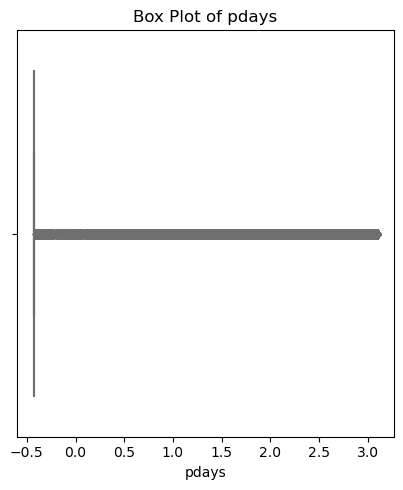

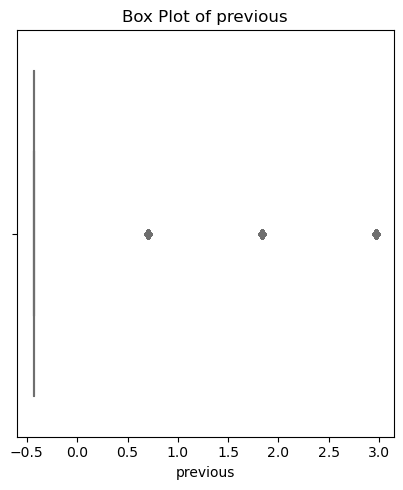

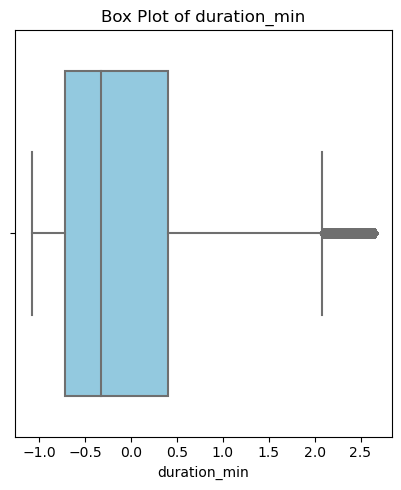

In [42]:
# Box Plots
for feature in numerical_columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

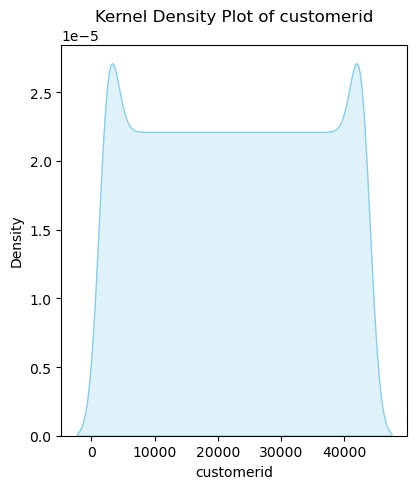

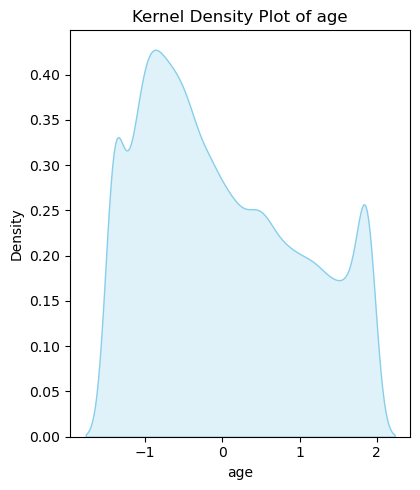

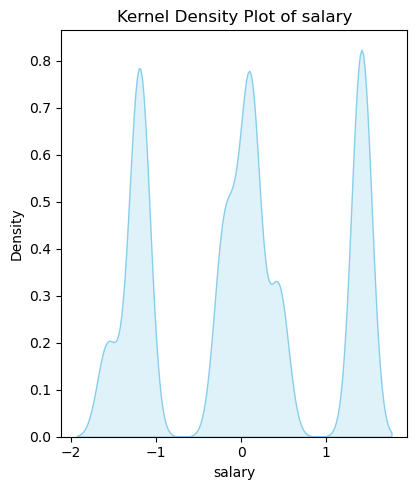

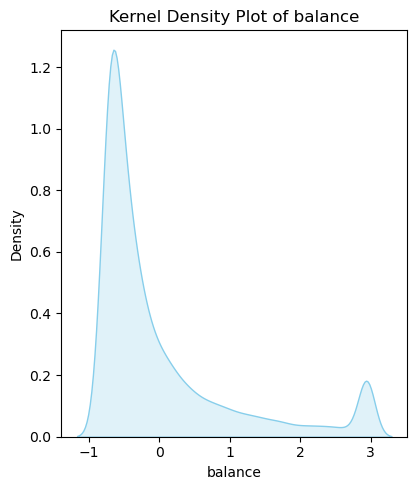

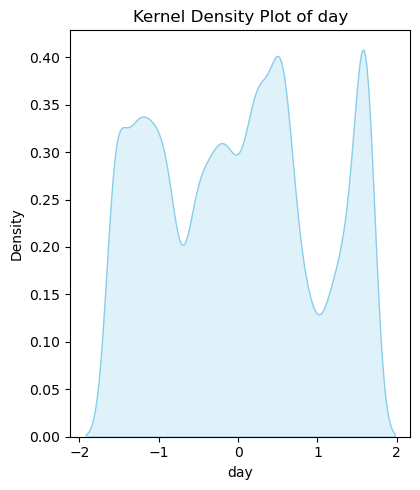

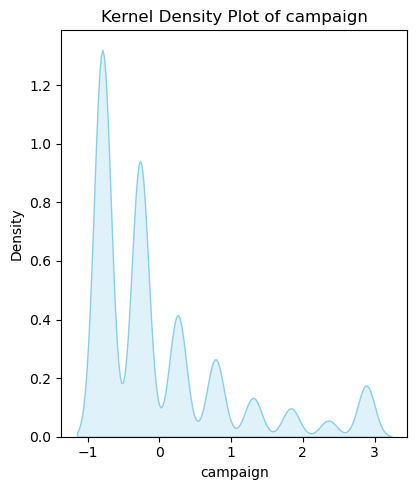

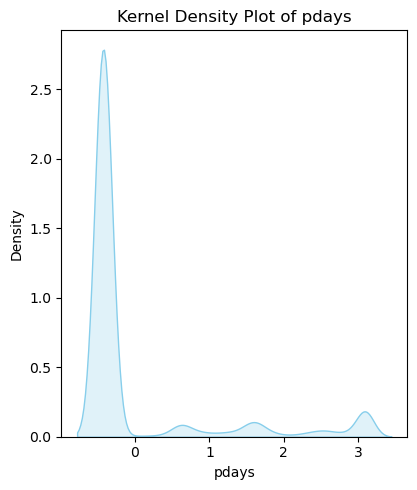

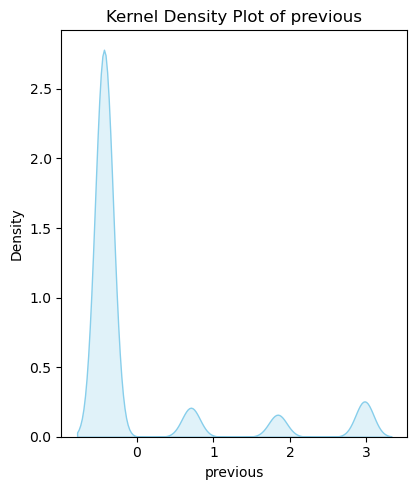

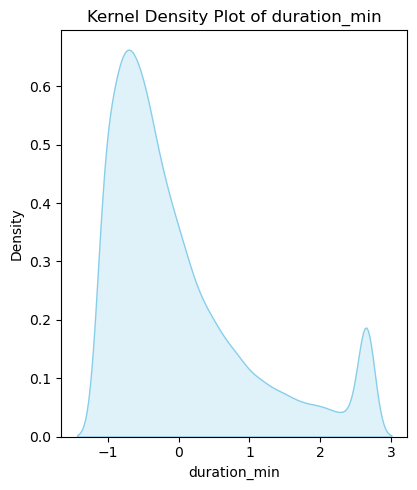

In [43]:
# Kernel Density Plots
for feature in numerical_columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[feature], color='skyblue', fill=True)
    plt.title(f'Kernel Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()

# 4. Bivariate Analysis

### a. Evaluate the relationship between independent variables and the target variable.

In [44]:
# Categorical independent variables
categorical_columns = ['marital', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Job', 'Jobtype']

# Numerical independent variables
numerical_columns = ['age', 'salary', 'balance', 'campaign', 'pdays', 'previous', 'duration_min']

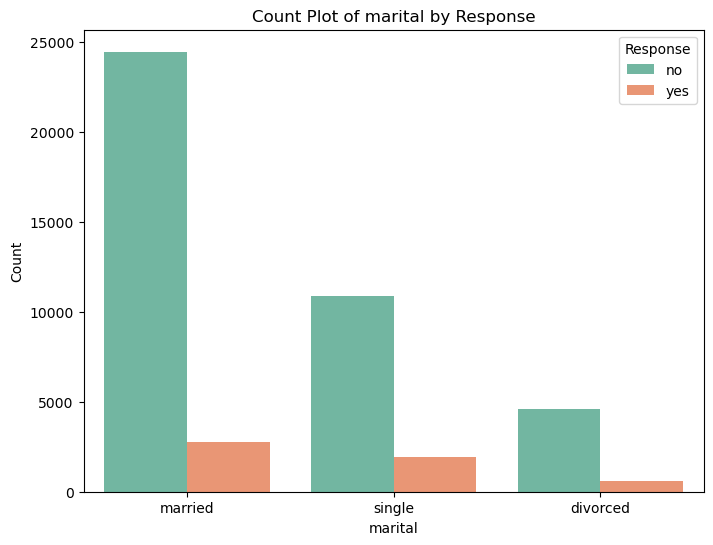

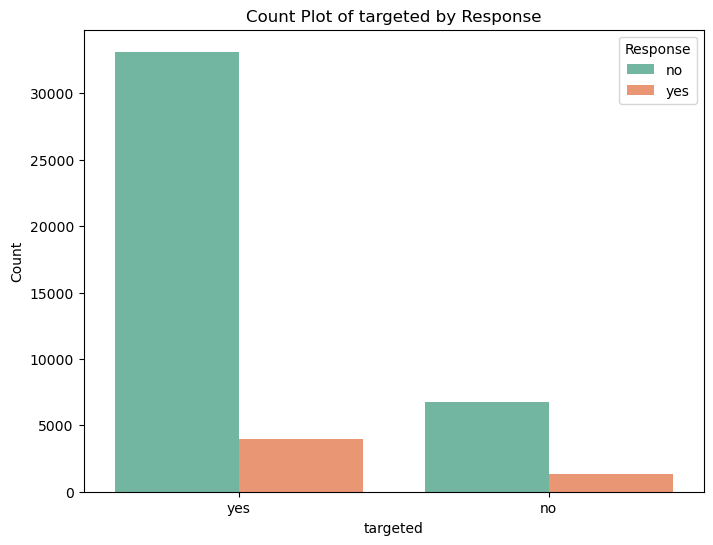

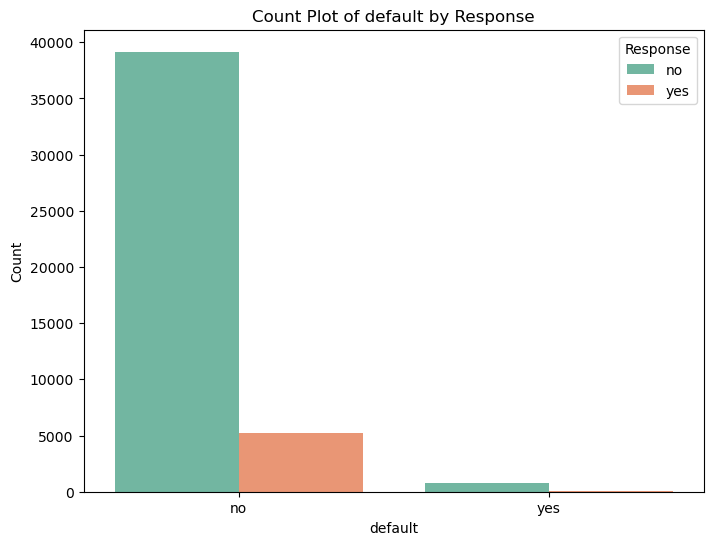

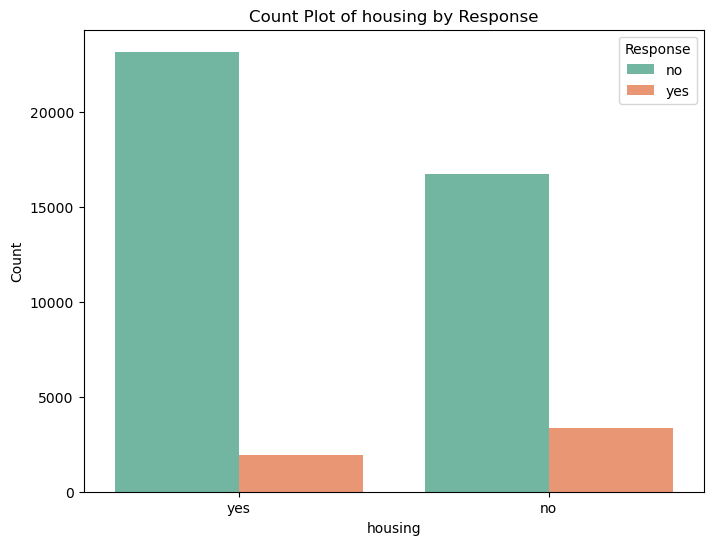

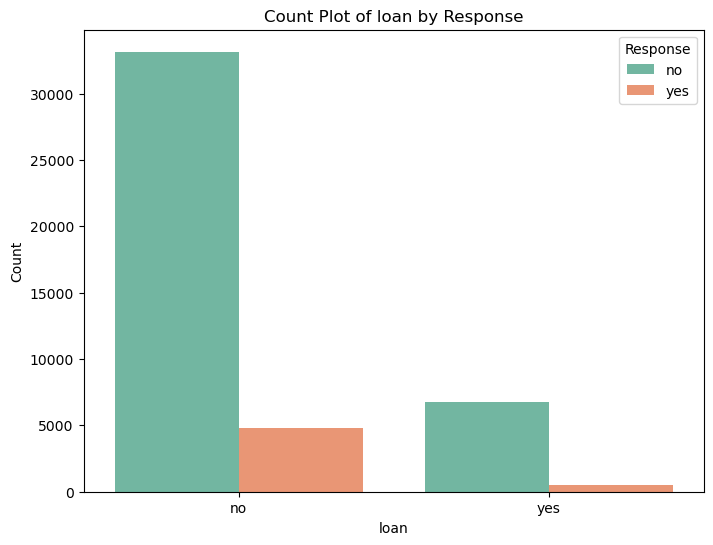

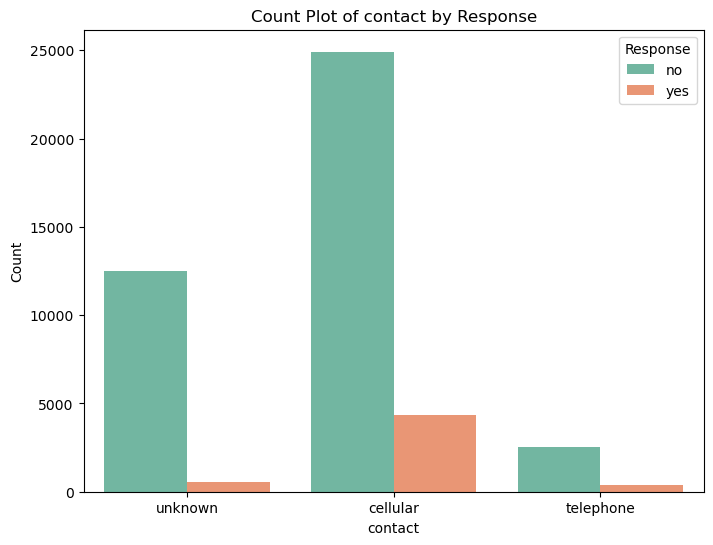

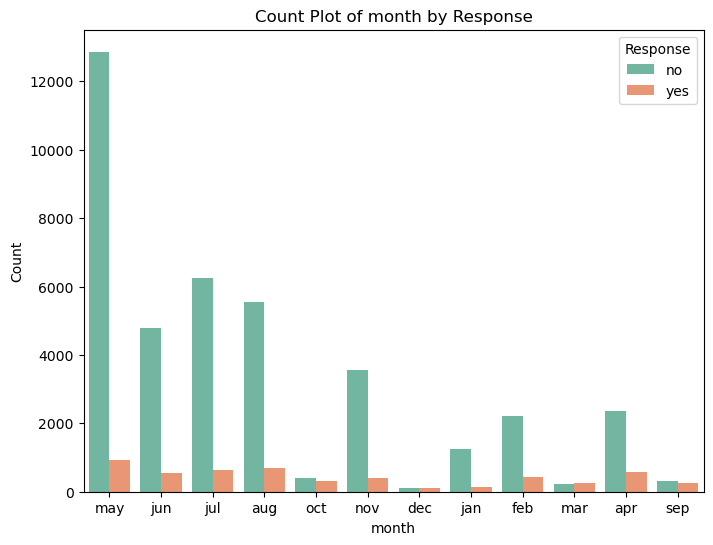

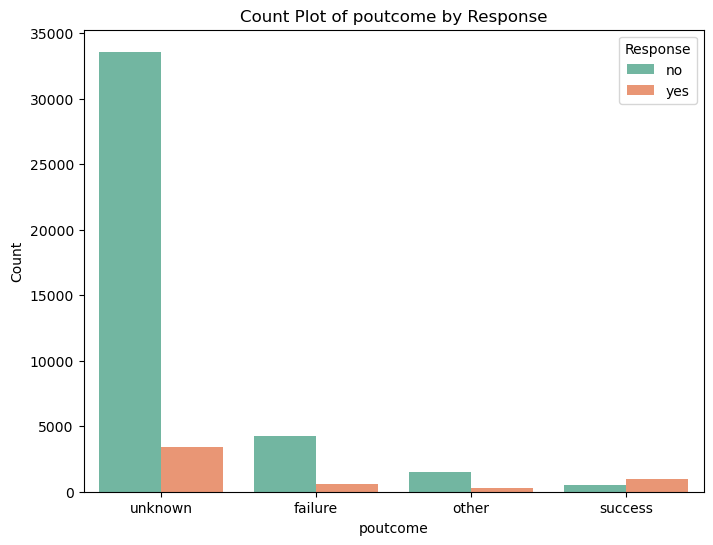

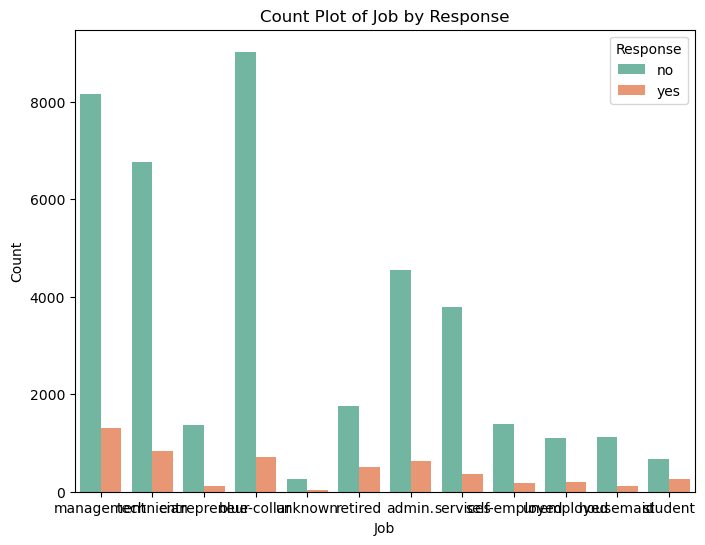

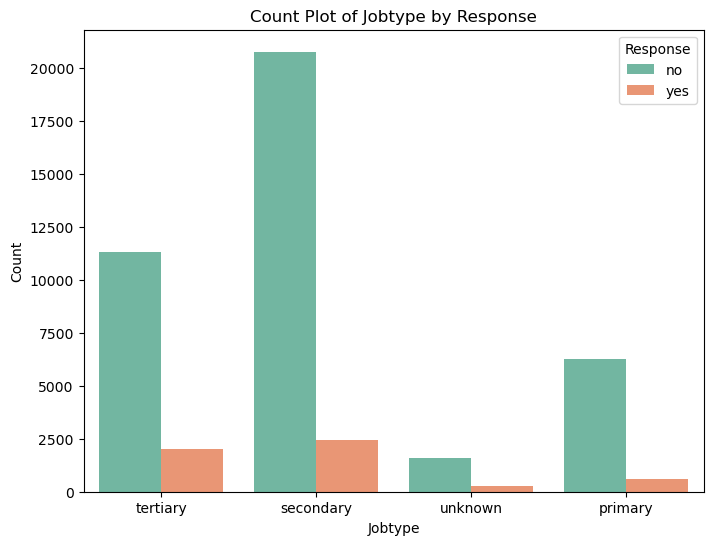

In [45]:
# Count plot for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='response', data=df, palette='Set2')
    plt.title(f'Count Plot of {column} by Response')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Response', loc='upper right')
    plt.show()

C:\Users\Avinash\AppData\Local\Temp\ipykernel_6136\3472328740.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='response', y=column, data=df, palette='Set2')


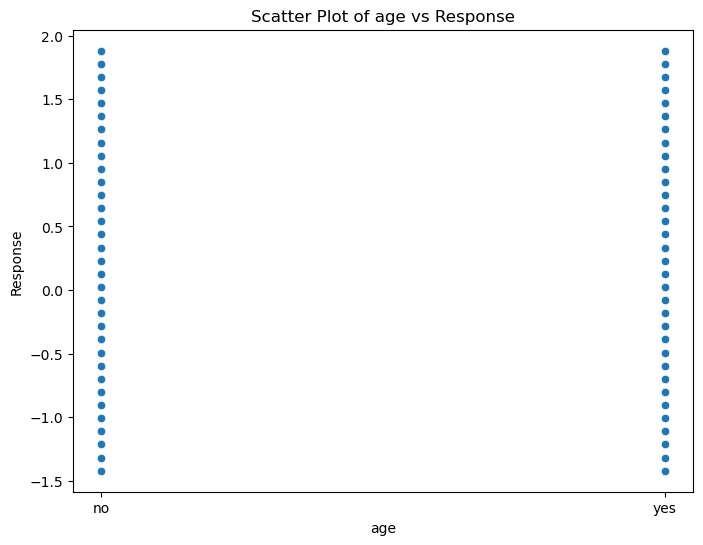

C:\Users\Avinash\AppData\Local\Temp\ipykernel_6136\3472328740.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='response', y=column, data=df, palette='Set2')


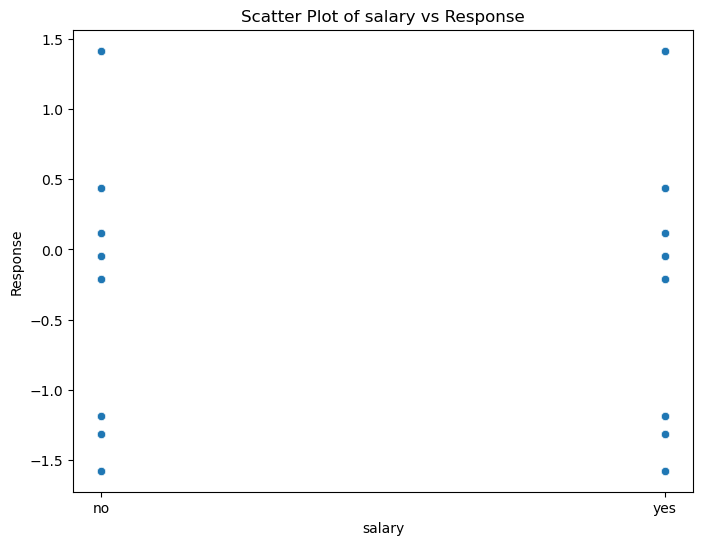

C:\Users\Avinash\AppData\Local\Temp\ipykernel_6136\3472328740.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='response', y=column, data=df, palette='Set2')


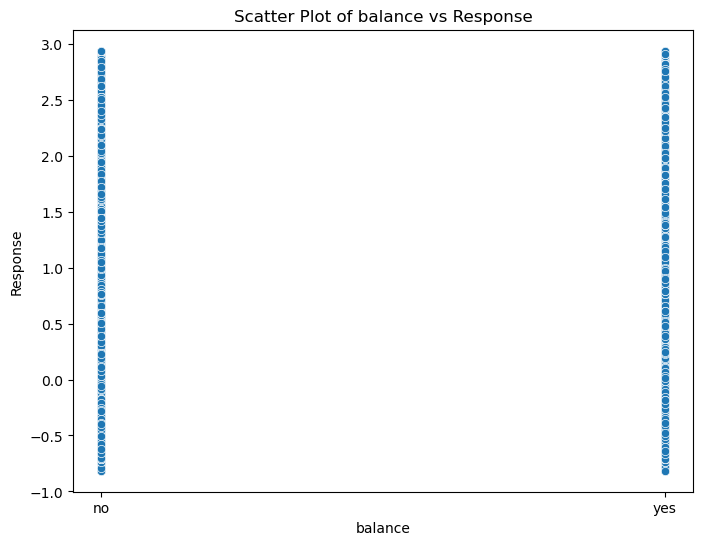

C:\Users\Avinash\AppData\Local\Temp\ipykernel_6136\3472328740.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='response', y=column, data=df, palette='Set2')


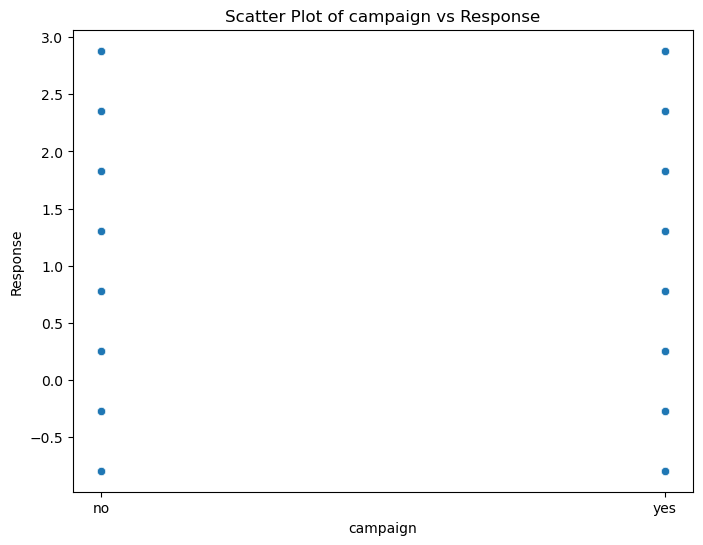

C:\Users\Avinash\AppData\Local\Temp\ipykernel_6136\3472328740.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='response', y=column, data=df, palette='Set2')


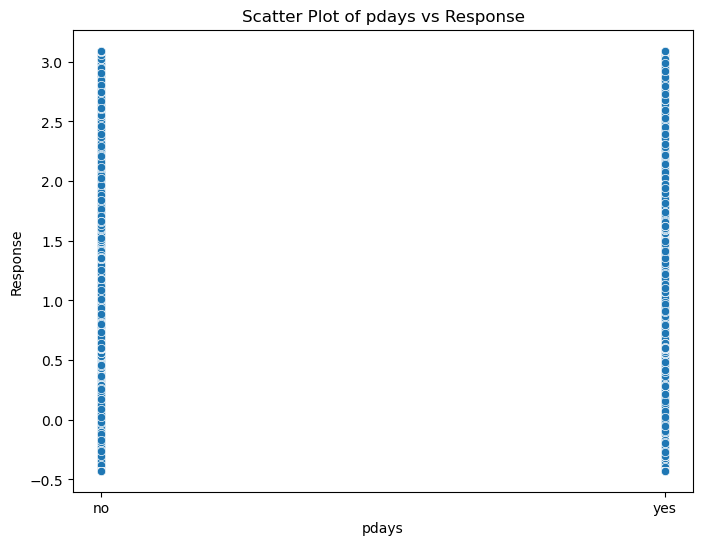

C:\Users\Avinash\AppData\Local\Temp\ipykernel_6136\3472328740.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='response', y=column, data=df, palette='Set2')


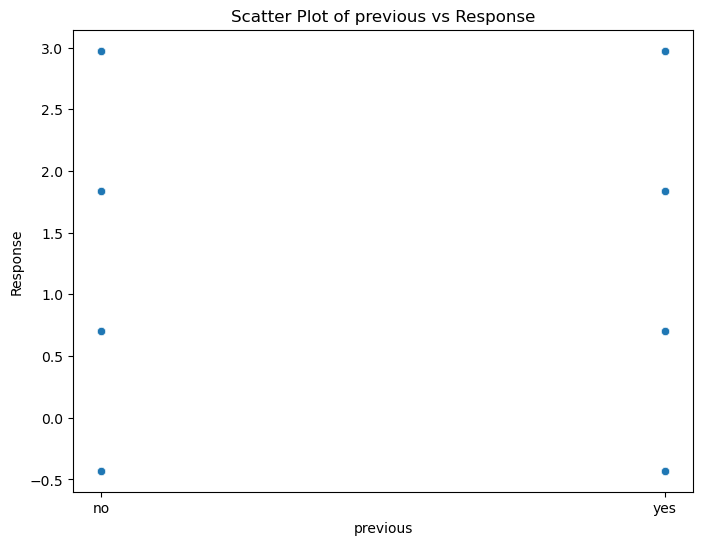

C:\Users\Avinash\AppData\Local\Temp\ipykernel_6136\3472328740.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='response', y=column, data=df, palette='Set2')


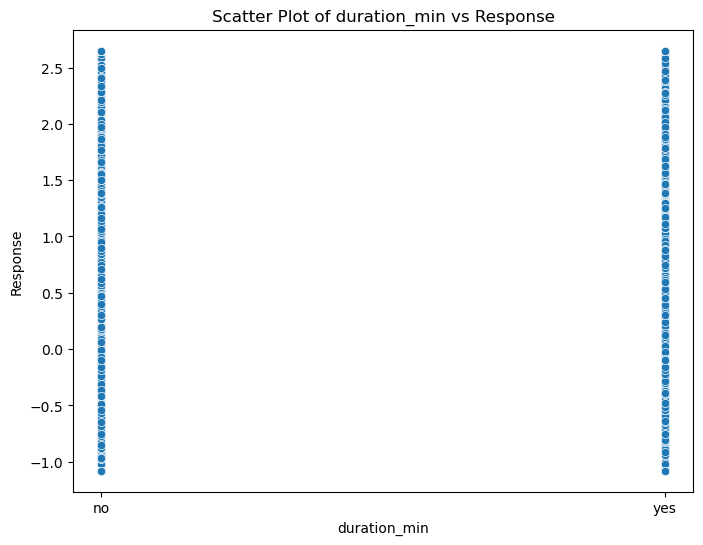

In [46]:
# scatter plots for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='response', y=column, data=df, palette='Set2')
    plt.title(f'Scatter Plot of {column} vs Response')
    plt.xlabel(column)
    plt.ylabel('Response')
    plt.show()

### b. Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, using visualizations like bar charts, stacked bar charts, and heatmaps.


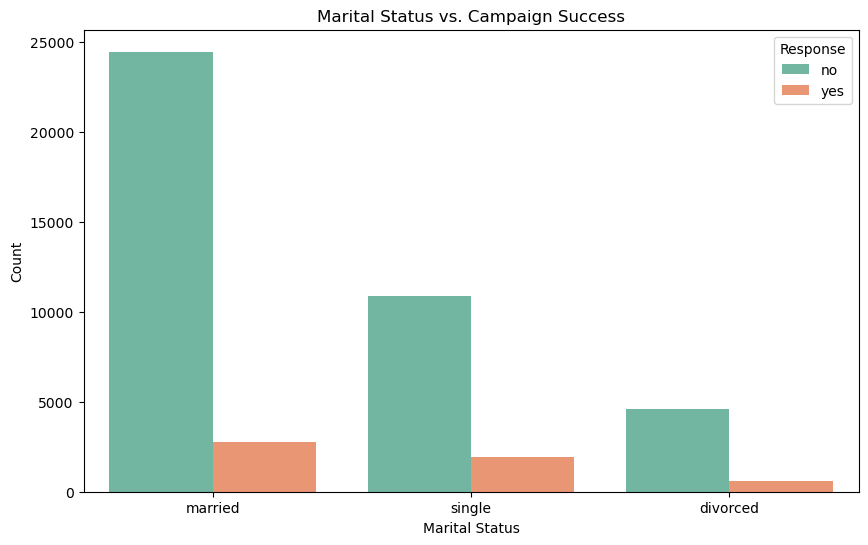

In [47]:
# Plotting a bar chart for marital status vs. campaign success
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='response', data=df, palette='Set2')
plt.title('Marital Status vs. Campaign Success')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.show()

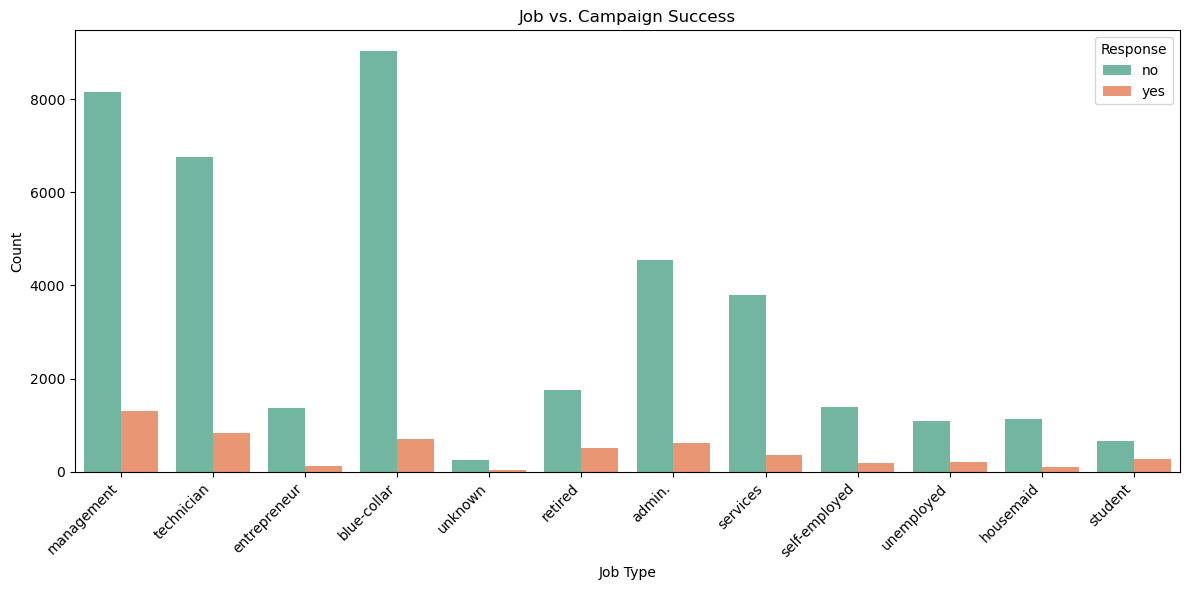

In [48]:
# Plotting a stacked bar chart for job type vs. campaign success
plt.figure(figsize=(12, 6))
sns.countplot(x='Job', hue='response', data=df, palette='Set2')
plt.title('Job vs. Campaign Success')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

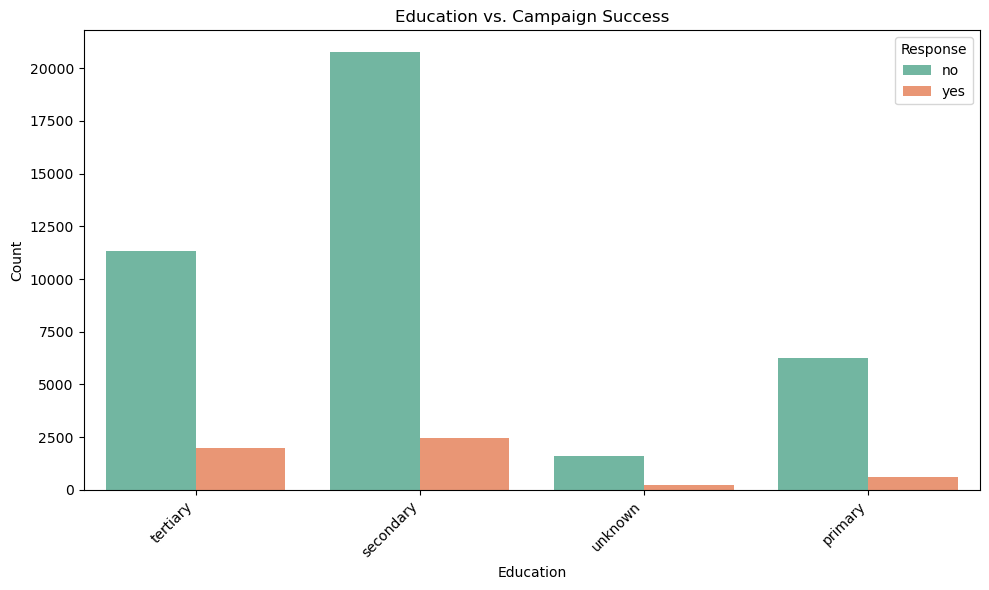

In [49]:
# Plotting a stacked bar chart for education vs. campaign success
plt.figure(figsize=(10, 6))
sns.countplot(x='Jobtype', hue='response', data=df, palette='Set2')
plt.title('Education vs. Campaign Success')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

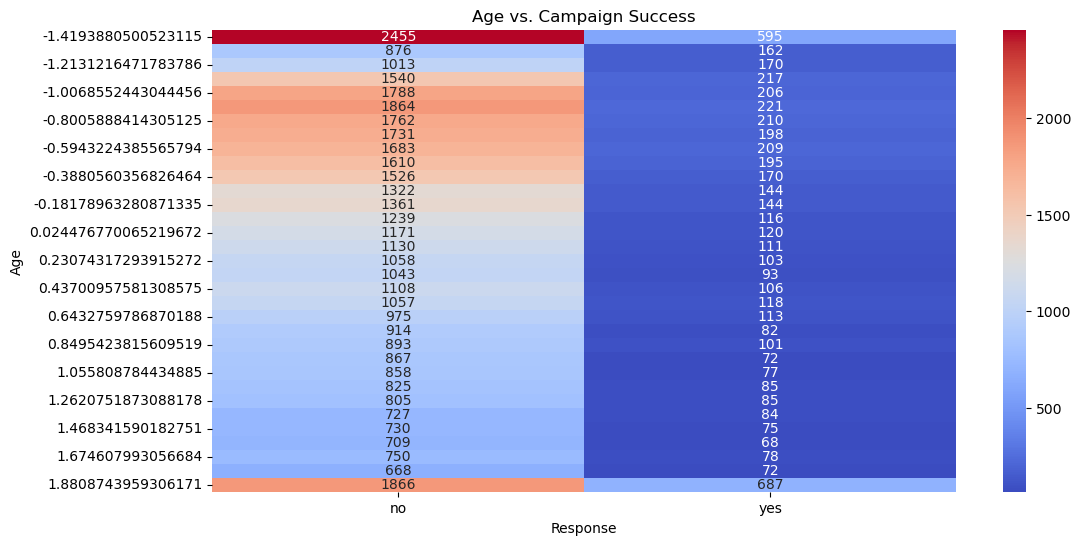

In [50]:
# Creating a pivot table for age vs. campaign success
age_campaign_pivot = df.pivot_table(index='age', columns='response', aggfunc='size')

# Plotting a heatmap for age vs. campaign success
plt.figure(figsize=(12, 6))
sns.heatmap(age_campaign_pivot, cmap='coolwarm', annot=True, fmt='g')
plt.title('Age vs. Campaign Success')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()

# 5. Categorical Variables Analysis

### a. Investigate the distribution of categorical variables such as job type, education, and marital status.

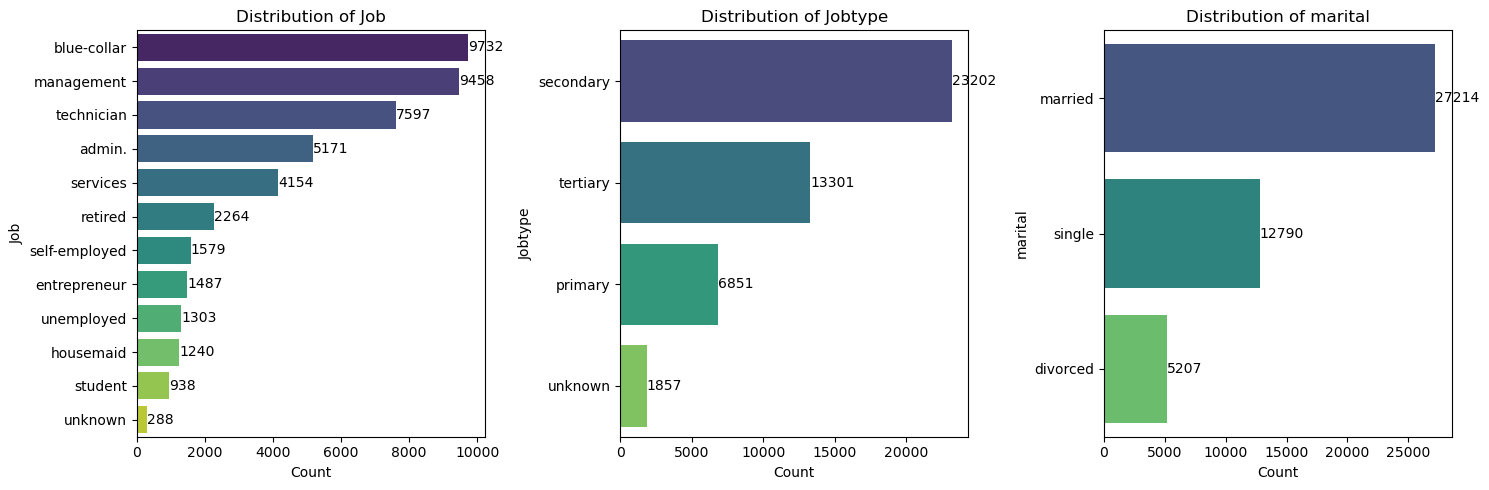

In [51]:
cat_var = ['Job', 'Jobtype', 'marital']

# count plots for each categorical variable
plt.figure(figsize=(15, 5))
for i, variable in enumerate(cat_var, 1):
    plt.subplot(1, len(cat_var), i)
    sns.countplot(y=variable, data=df, order=df[variable].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {variable}')
    plt.xlabel('Count')
    plt.ylabel(variable)
    counts = df[variable].value_counts()
    for idx, count in enumerate(counts):
        plt.text(count + 1, idx, str(count), ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

### b. Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.

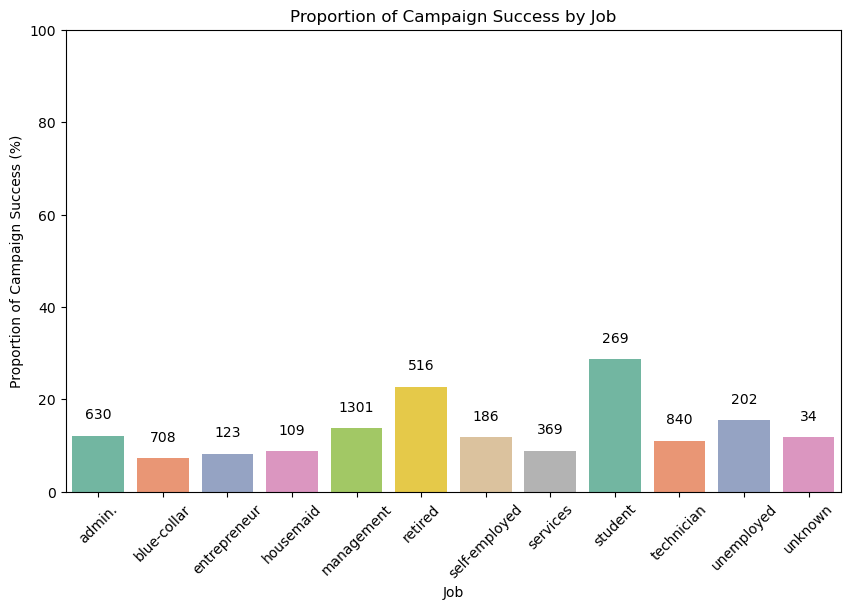

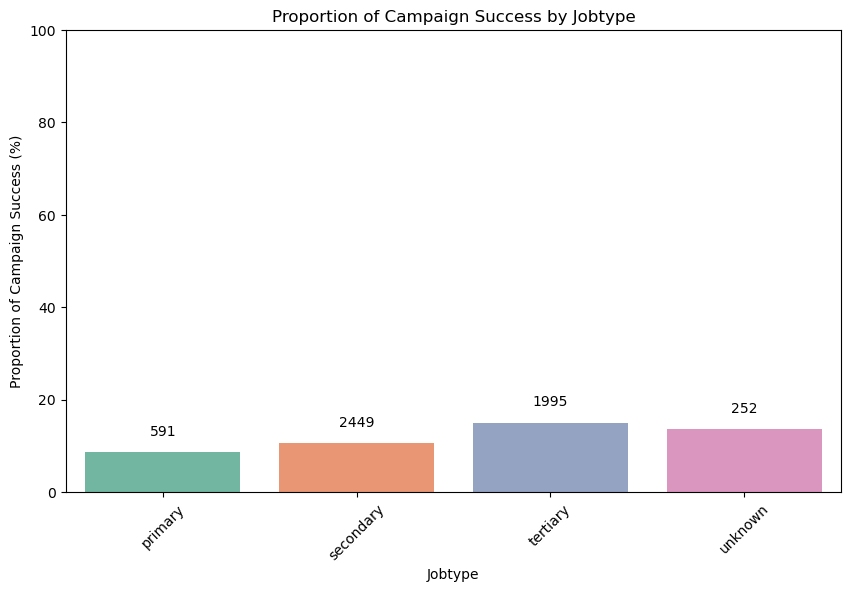

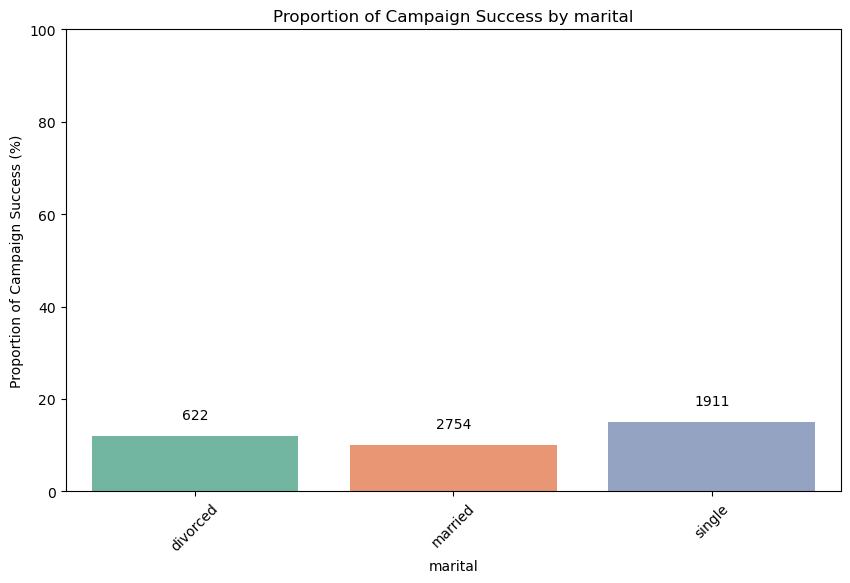

In [52]:
# Calculating the total count of 'yes' responses for each category
total_counts = {}
for variable in cat_var:
    total_counts[variable] = df[df['response'] == 'yes'].groupby(variable)['response'].count()

# Calculate the proportion of campaign success within each category
proportions = {}
for variable in cat_var:
    proportions[variable] = df.groupby(variable)['response'].apply(lambda x: (sum(x == 'yes') / len(x)) * 100).reset_index()
    proportions[variable].rename(columns={'response': 'Proportion of Campaign Success (%)'}, inplace=True)

# Plot bar charts showing the proportion of campaign success within each category
for variable in cat_var:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=variable, y='Proportion of Campaign Success (%)', data=proportions[variable], palette='Set2')
    plt.title(f'Proportion of Campaign Success by {variable}')
    plt.xlabel(variable)
    plt.ylabel('Proportion of Campaign Success (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)  # y-axis limit from 0 to 100 for percentage
    
    # Add labels indicating the total count of 'yes' responses for each category
    for p, count in zip(ax.patches, total_counts[variable]):
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')
    
    plt.show()

# 6. Temporal Analysis

### a. Investigate temporal patterns in the success of the campaign over time.

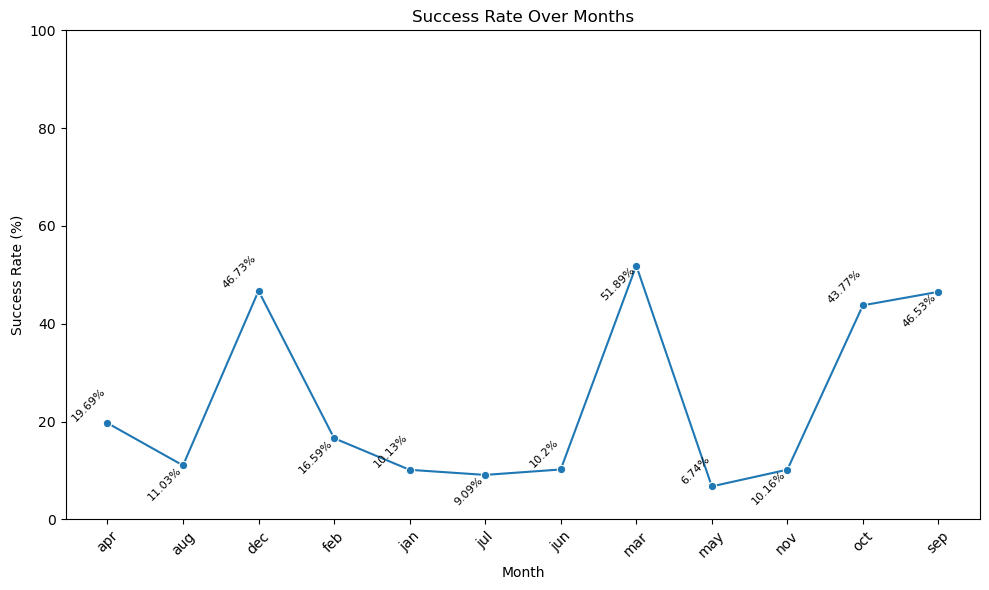

In [53]:
# Group data by month and calculate success rate
monthly_success_rate = df.groupby('month')['response'].apply(lambda x: sum(x == 'yes') / len(x) * 100).reset_index()

# Plot temporal patterns using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='response', data=monthly_success_rate, marker='o')
plt.title('Success Rate Over Months')
plt.xlabel('Month')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
for i, (_, row) in enumerate(monthly_success_rate.iterrows()):
    plt.text(row['month'], row['response'], f'{round(row["response"], 2)}%', ha='right', va='bottom' if i % 2 == 0 else 'top', fontsize=8, rotation=45)

plt.show()

### b. Analyze if specific months or days exhibit superior campaign performance.


0    39924
1     5287
Name: response, dtype: int64


C:\Users\Avinash\AppData\Local\Temp\ipykernel_6136\2564238215.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='response', data=df, estimator='mean', ci=None, palette='Set2')


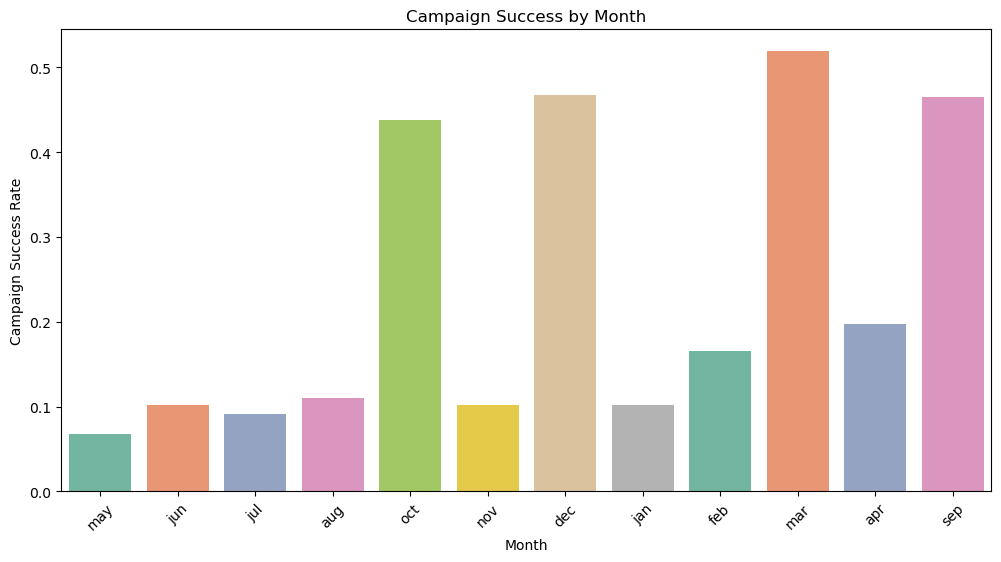

In [54]:
# Convert 'response' column to numeric values (0 for 'no' and 1 for 'yes')
df['response'] = df['response'].map({'no': 0, 'yes': 1})

# Check the data distribution in the 'response' column
print(df['response'].value_counts())

# Create a bar plot to analyze campaign success by month
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='response', data=df, estimator='mean', ci=None, palette='Set2')
plt.title('Campaign Success by Month')
plt.xlabel('Month')
plt.ylabel('Campaign Success Rate')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.show()

# 7. Feature Engineering

### a. Introduce new features that may enhance prediction, such as creating age groups or income categories.

In [63]:
# Create age groups
bins = [0, 30, 50, 100]  # Define age group bins
labels = ['young', 'middle-aged', 'senior']  # Define age group labels
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create income categories
salary_bins = [0, 30000, 60000, 90000, float('inf')]  # Define income bins
salary_labels = ['low', 'medium', 'high', 'very high']  # Define income labels
df['income_category'] = pd.cut(df['salary'], bins=salary_bins, labels=salary_labels, right=False)

print(df[['age', 'age_group', 'salary', 'income_category']].head())

        age age_group    salary income_category
0  1.777741     young  1.415175             low
1  0.333876     young  0.114393             low
2 -0.800589       NaN  1.415175             low
3  0.643276     young -1.186388             NaN
4 -0.800589       NaN -1.576622             NaN


### b. Apply encoding techniques to transform categorical variables if necessary

In [64]:
# Applying one-hot encoding to nominal categorical variables
nominal_categoricals = ['marital', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Job', 'Jobtype']
df_encoded = pd.get_dummies(df, columns=nominal_categoricals, drop_first=True)

# Applying label encoding to ordinal categorical variables
ordinal_categoricals = ['year']  # Assuming 'year' is an ordinal categorical variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['year_encoded'] = label_encoder.fit_transform(df['year'])

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   customerid       age    salary   balance       day  campaign     pdays  \
0        2261  1.777741  1.415175  0.648845 -1.324169 -0.793438 -0.426599   
1        2261  0.333876  0.114393 -0.688042 -1.324169 -0.793438 -0.426599   
2        2261 -0.800589  1.415175 -0.705116 -1.324169 -0.793438 -0.426599   
3        2261  0.643276 -1.186388  0.246008 -1.324169 -0.793438 -0.426599   
4        2261 -0.800589 -1.576622 -0.705749 -1.324169 -0.793438 -0.426599   

   previous  response   year  ...  Job_self-employed Job_services Job_student  \
0 -0.429644       NaN   2017  ...                  0            0           0   
1 -0.429644       NaN   2017  ...                  0            0           0   
2 -0.429644       NaN   2017  ...                  0            0           0   
3 -0.429644       NaN   2017  ...                  0            0           0   
4 -0.429644       NaN   2017  ...                  0            0           0   

   Job_technician  Job_unemployed  Job_unknown  Jo

# 8. Correlation Analysis

### a. Examine correlations between independent variables to identify multicollinearity.


C:\Users\Avinash\AppData\Local\Temp\ipykernel_6136\204596388.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


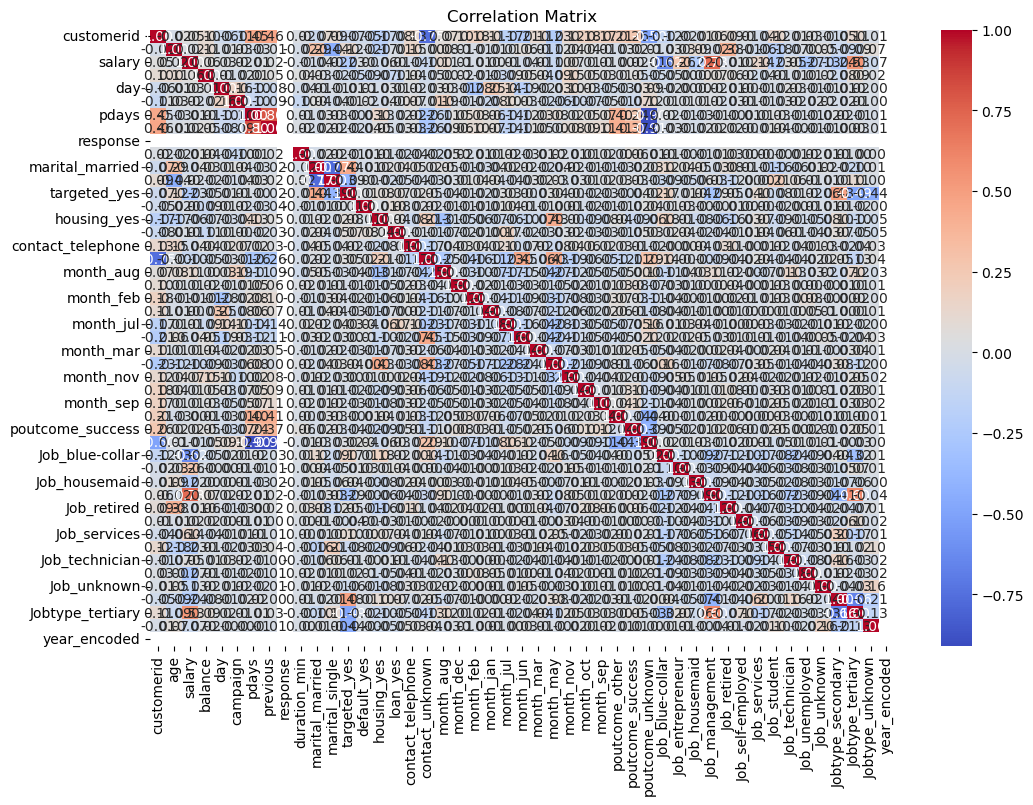

In [69]:
# Calculating the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### b. Evaluate how correlated features may influence the target variable.


In [72]:
print(df_encoded.columns)

Index(['customerid', 'age', 'salary', 'balance', 'day', 'campaign', 'pdays',
       'previous', 'response', 'year', 'duration_min', 'age_group',
       'income_category', 'marital_married', 'marital_single', 'targeted_yes',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'Job_blue-collar', 'Job_entrepreneur',
       'Job_housemaid', 'Job_management', 'Job_retired', 'Job_self-employed',
       'Job_services', 'Job_student', 'Job_technician', 'Job_unemployed',
       'Job_unknown', 'Jobtype_secondary', 'Jobtype_tertiary',
       'Jobtype_unknown', 'year_encoded'],
      dtype='object')


C:\Users\Avinash\AppData\Local\Temp\ipykernel_6136\2206066454.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


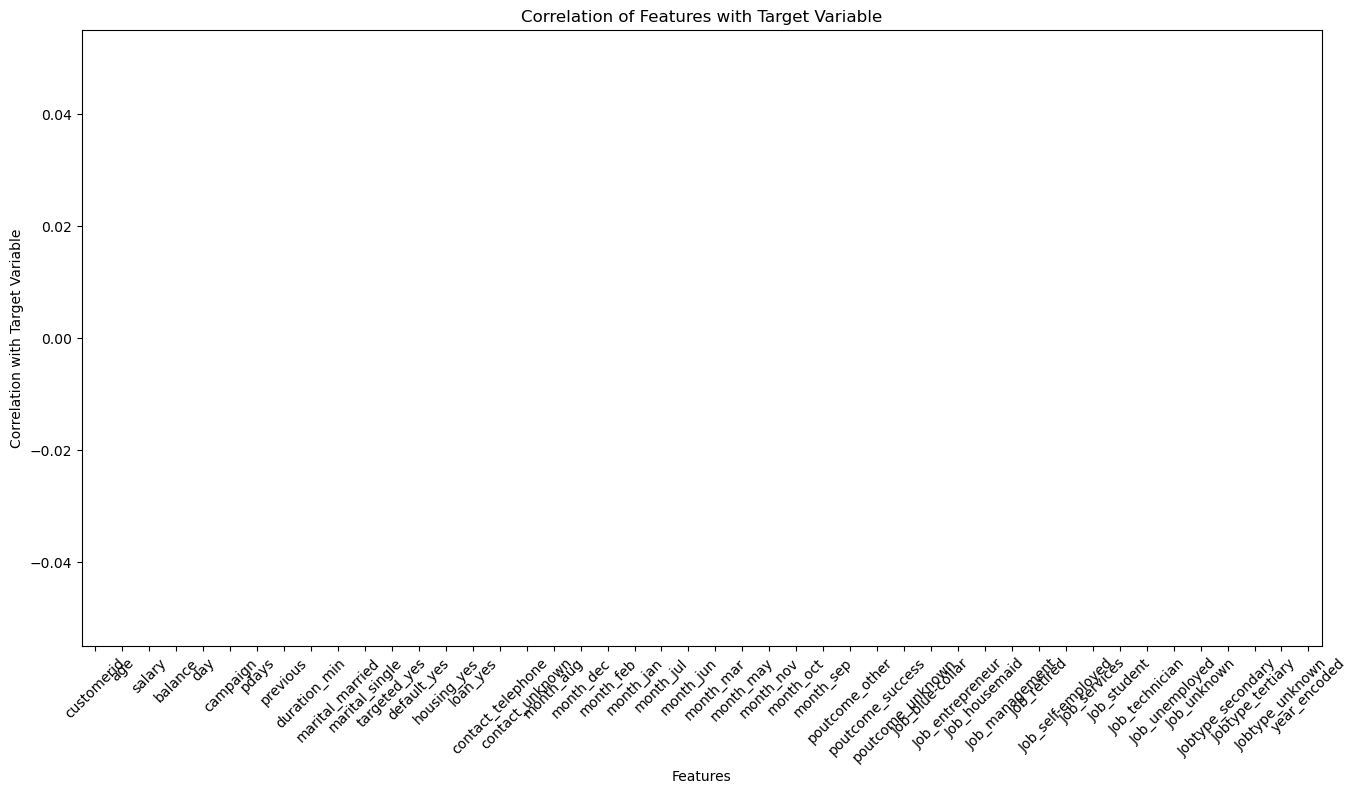

In [75]:
# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Extract correlation of features with the target variable
target_correlation = correlation_matrix[target_variable].drop(target_variable)

# Plot the correlation with the target variable
plt.figure(figsize=(16, 8))
sns.barplot(x=target_correlation.index, y=target_correlation.values, color='skyblue')
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation with Target Variable')
plt.xticks(rotation=45)
plt.show()